In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
#from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")



In [7]:
df = pd.read_csv("./data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
print(df.shape)
print(df.dtypes)
print(df.duplicated().sum())
print(df.isnull().sum())
print(df.nunique())

(7043, 21)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMeth

In [10]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.000,1.00,1.000,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,0.00,1.000,29.000,72.00,72.000,72.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,18.25,19.650,70.350,107.40,114.729,118.75,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,18.80,49.605,1397.475,6923.59,8039.883,8684.80,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.000,0.000,1.00,1.000,1.00,1.00


In [14]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
df.dropna(inplace = True)

In [16]:
df.drop("customerID", axis = 1, inplace = True)

In [17]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    
    return cat_cols, num_cols, cat_but_car

In [19]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
print("#############")
print(f"Cat_Cols : {cat_cols}")
print("#############")
print(f"Num_Cols : {num_cols}")
print("#############")
print(f"Cat_But_Car : {cat_but_car}")

Observations: 7032
Variables: 20
cat_cols: 17
num_cols: 3
cat_but_car: 0
num_but_cat: 2
#############
Cat_Cols : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'Churn']
#############
Num_Cols : ['tenure', 'MonthlyCharges', 'TotalCharges']
#############
Cat_But_Car : []


In [20]:
def cat_summary(dataframe, col_name, plot=False):

    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)

        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
            
            # TARGET_COUNT
            sns.countplot(x=col_name, data=dataframe, ax=ax1)
            ax1.set_title(f"Frequency of {col_name}")
            ax1.set_ylabel("TARGET_COUNT")
            ax1.tick_params(axis="x", rotation=45)
            
            # RATIO
            values = dataframe[col_name].value_counts()
            ax2.pie(x=values, labels=values.index, autopct="%1.1f%%", startangle=90)
            ax2.set_title(f"RATIO by {col_name}")
            ax2.legend(labels=[f"{index} - {value/sum(values)*100:.2f}%" for index, value in zip(values.index, values)],
                    loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
            
            plt.tight_layout()
            plt.show()

    else:
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
            
            # TARGET_COUNT
            sns.countplot(x=col_name, data=dataframe, ax=ax1)
            ax1.set_title(f"Frequency of {col_name}")
            ax1.set_ylabel("TARGET_COUNT")
            ax1.tick_params(axis="x", rotation=45)
            
            # RATIO
            values = dataframe[col_name].value_counts()
            ax2.pie(x=values, labels=values.index, autopct="%1.1f%%", startangle=90)
            ax2.set_title(f"RATIO by {col_name}")
            ax2.legend(labels=[f"{index} - {value/sum(values)*100:.2f}%" for index, value in zip(values.index, values)],
                    loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
            
            plt.tight_layout()
            plt.show()

        gender      Ratio
gender                   
Male      3549  50.469283
Female    3483  49.530717
##########################################


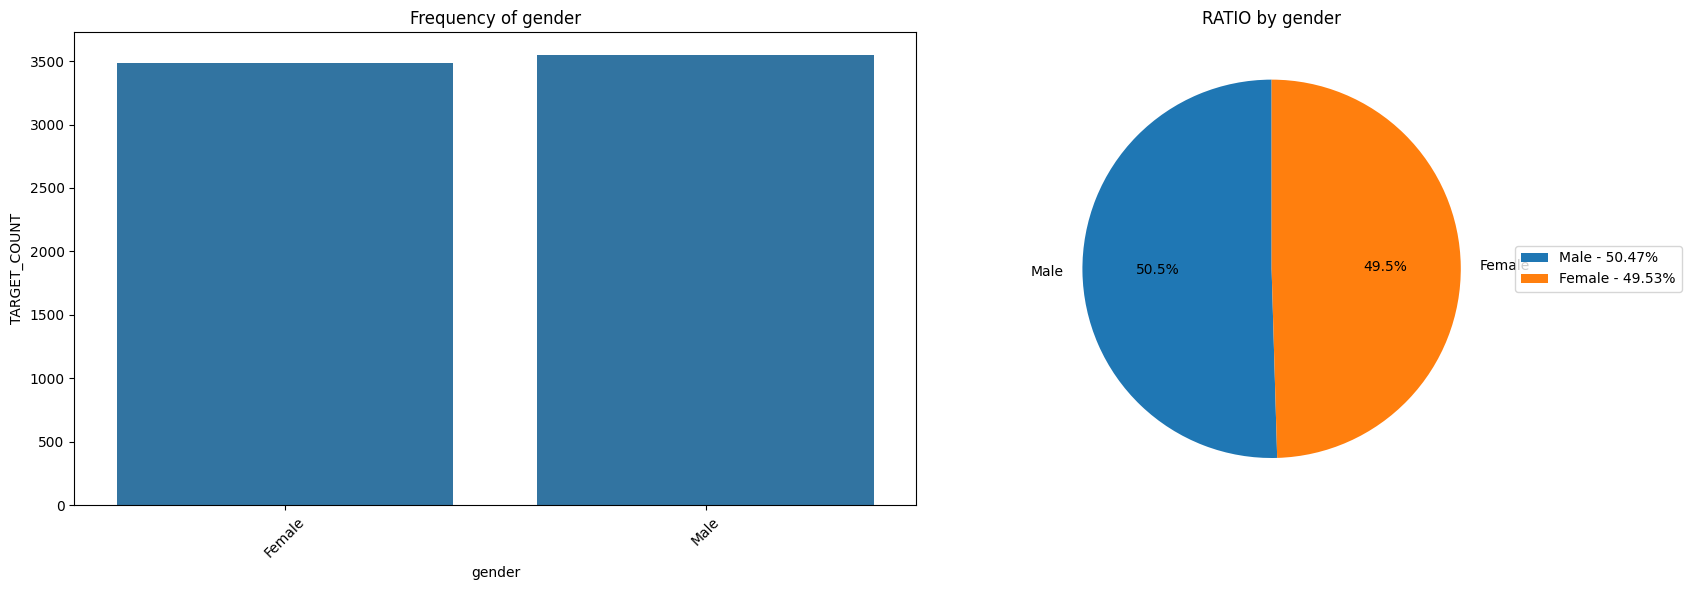

         Partner      Ratio
Partner                    
No          3639  51.749147
Yes         3393  48.250853
##########################################


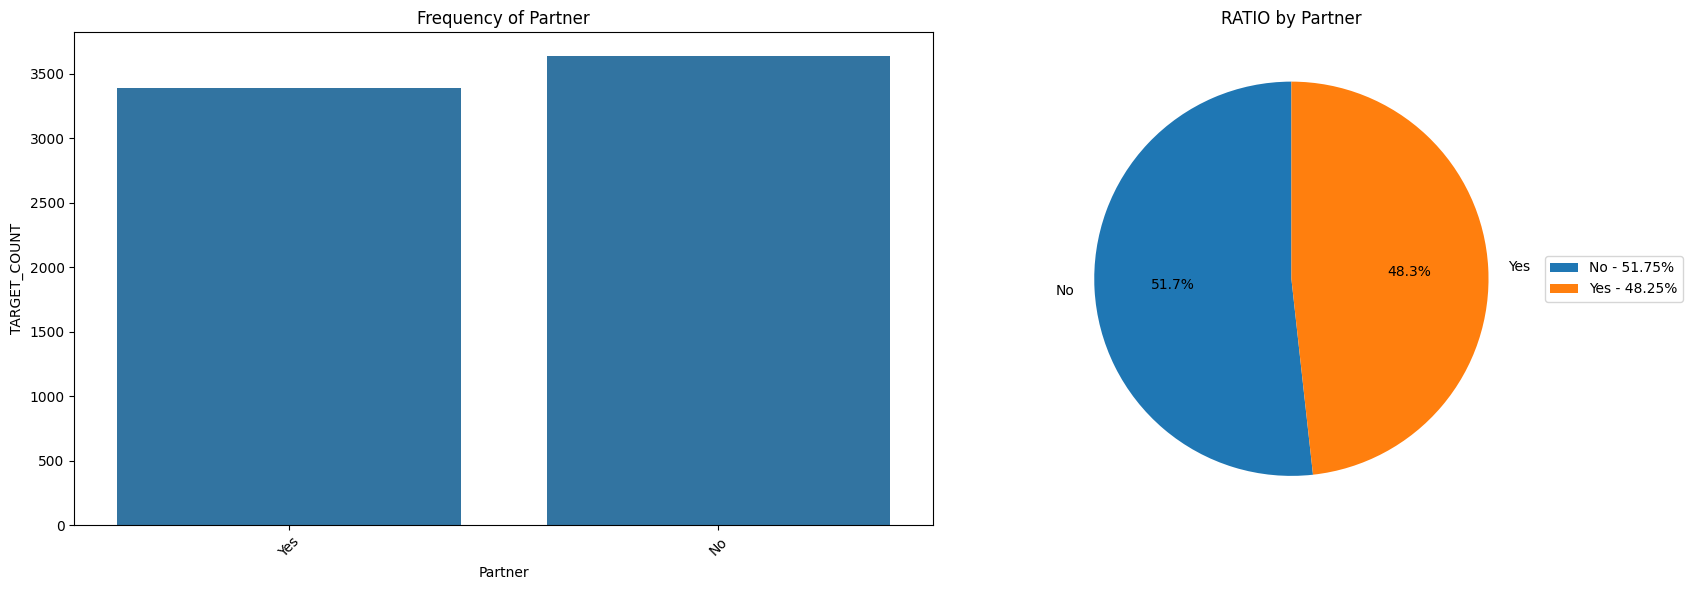

            Dependents      Ratio
Dependents                       
No                4933  70.150739
Yes               2099  29.849261
##########################################


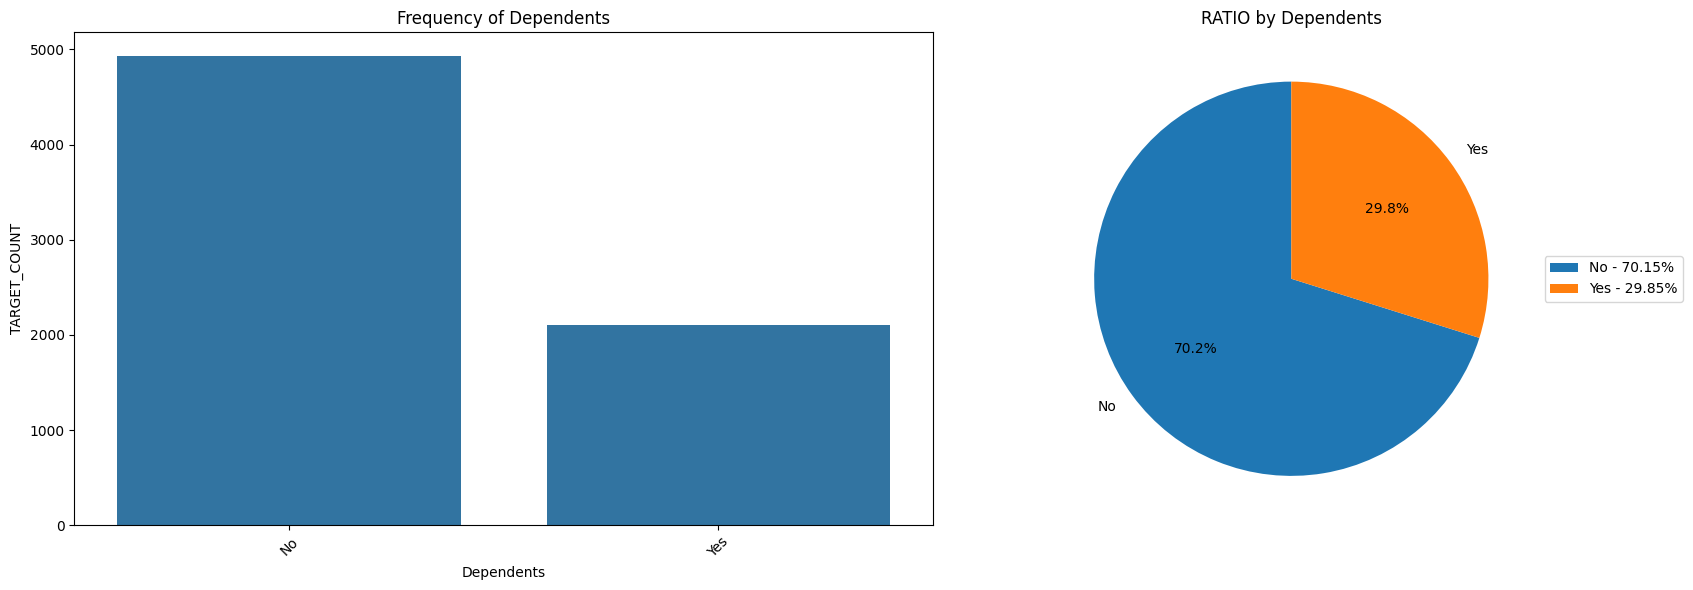

              PhoneService     Ratio
PhoneService                        
Yes                   6352  90.32992
No                     680   9.67008
##########################################


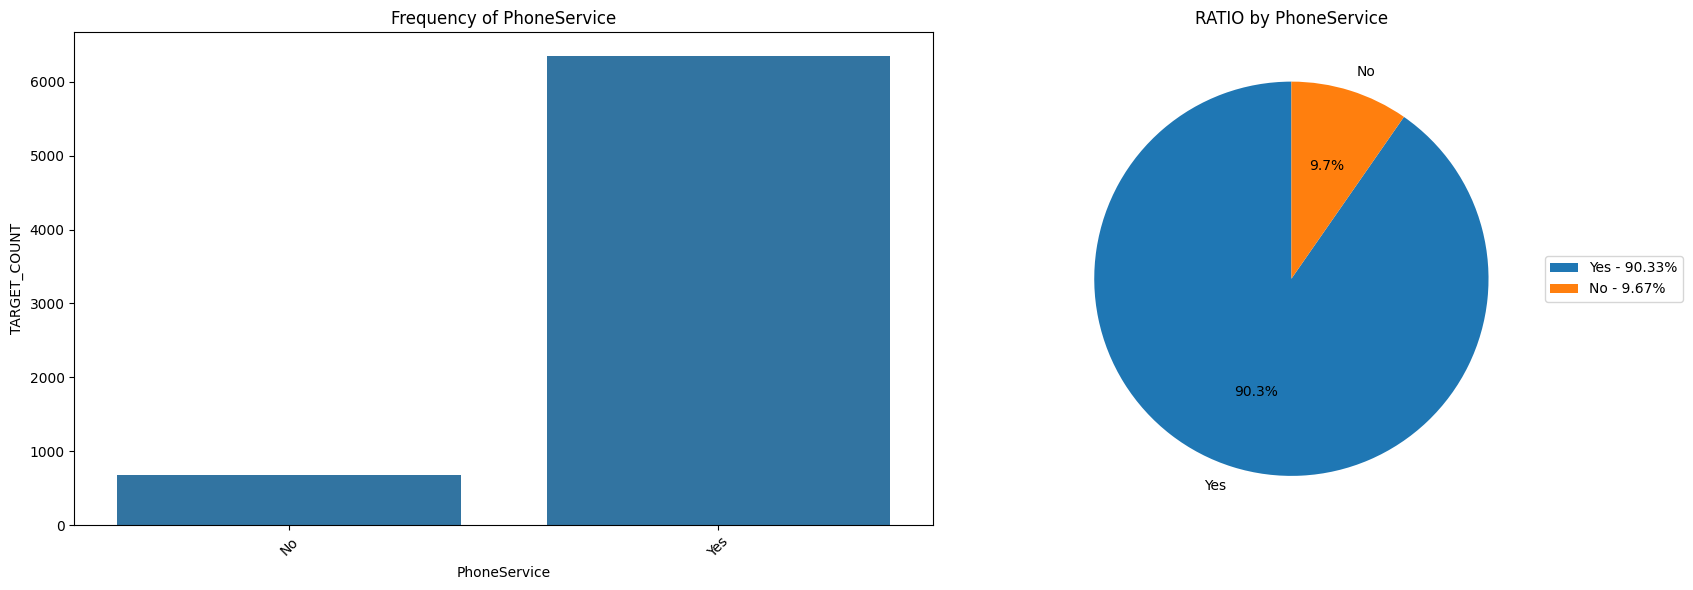

                  MultipleLines      Ratio
MultipleLines                             
No                         3385  48.137088
Yes                        2967  42.192833
No phone service            680   9.670080
##########################################


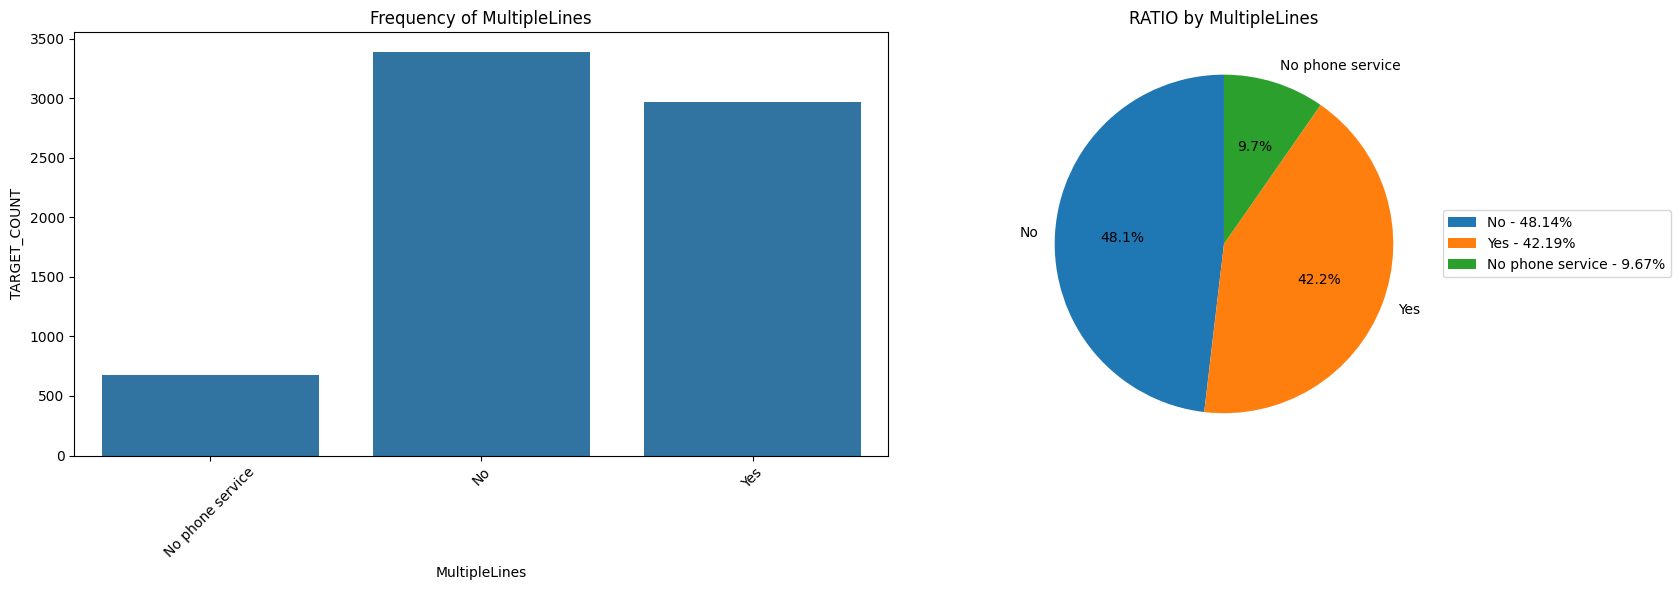

                 InternetService      Ratio
InternetService                            
Fiber optic                 3096  44.027304
DSL                         2416  34.357224
No                          1520  21.615472
##########################################


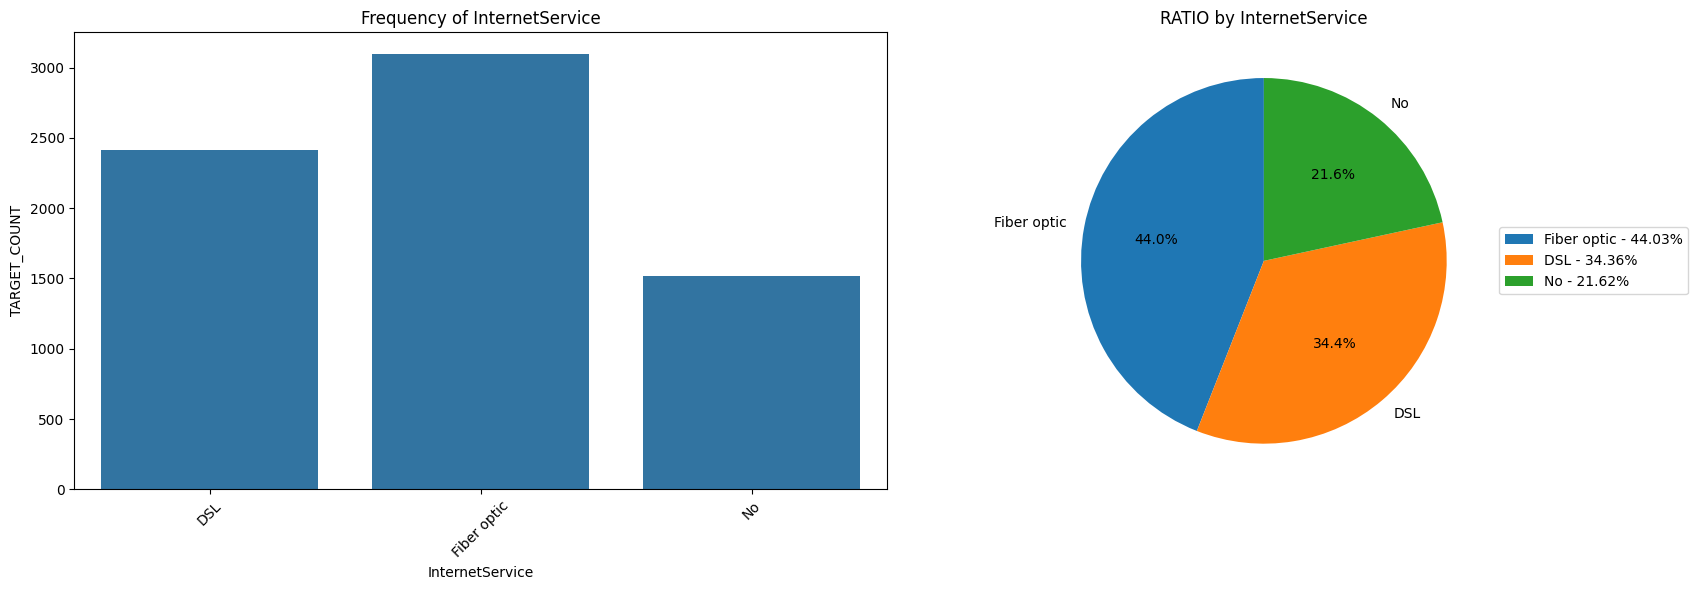

                     OnlineSecurity      Ratio
OnlineSecurity                                
No                             3497  49.729807
Yes                            2015  28.654721
No internet service            1520  21.615472
##########################################


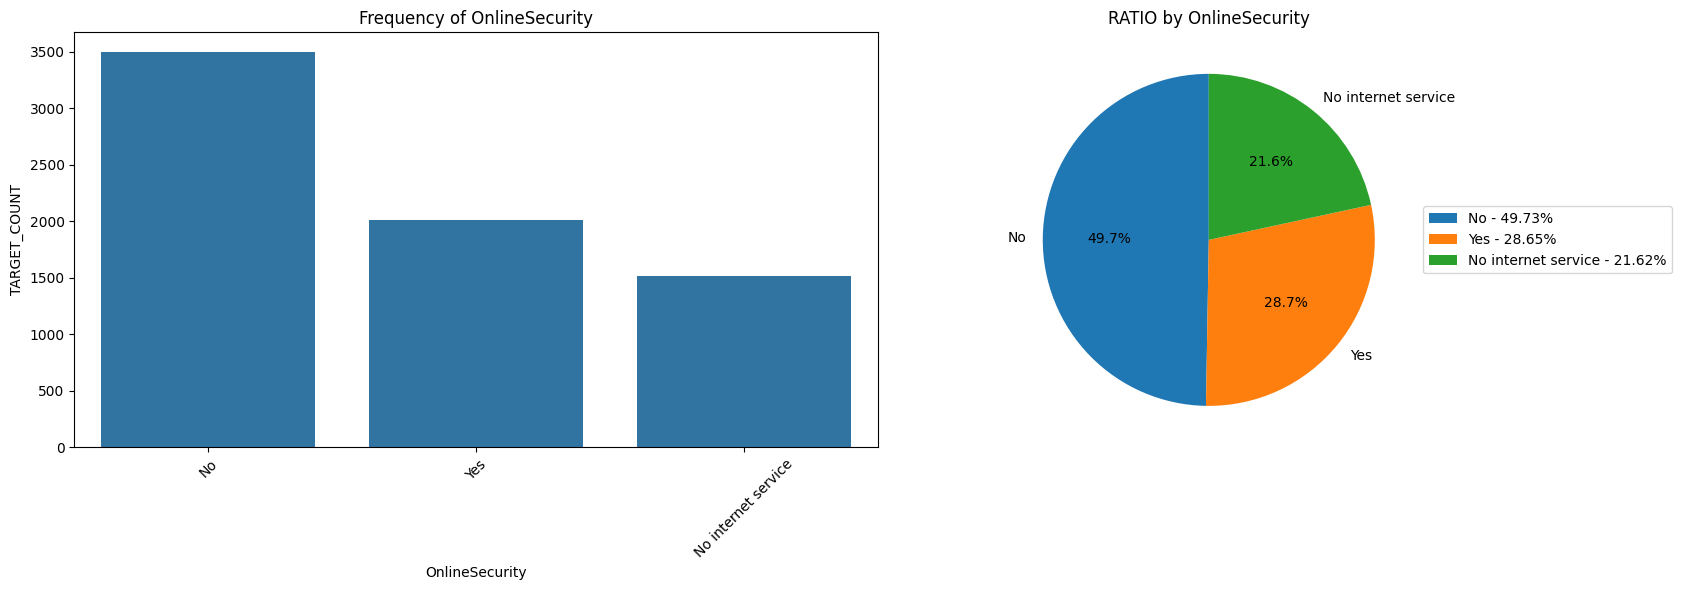

                     OnlineBackup      Ratio
OnlineBackup                                
No                           3087  43.899317
Yes                          2425  34.485210
No internet service          1520  21.615472
##########################################


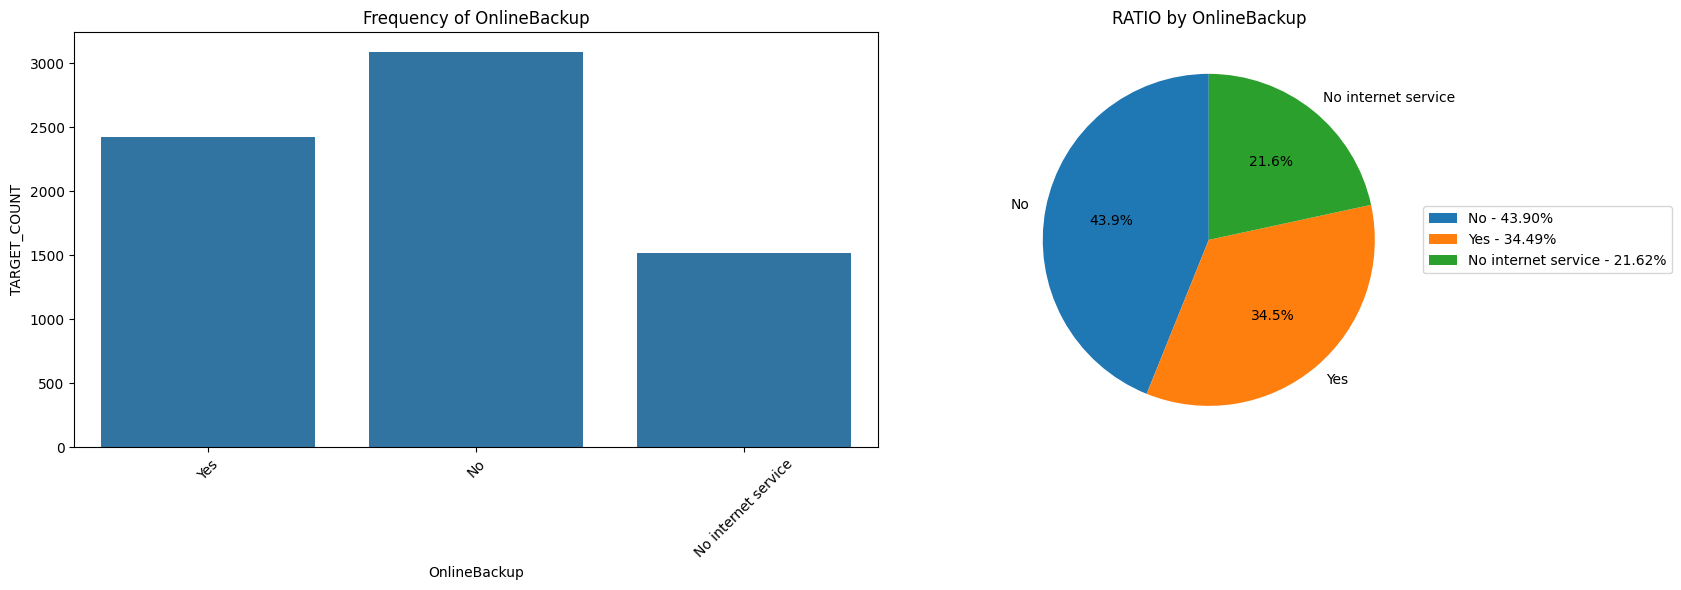

                     DeviceProtection      Ratio
DeviceProtection                                
No                               3094  43.998862
Yes                              2418  34.385666
No internet service              1520  21.615472
##########################################


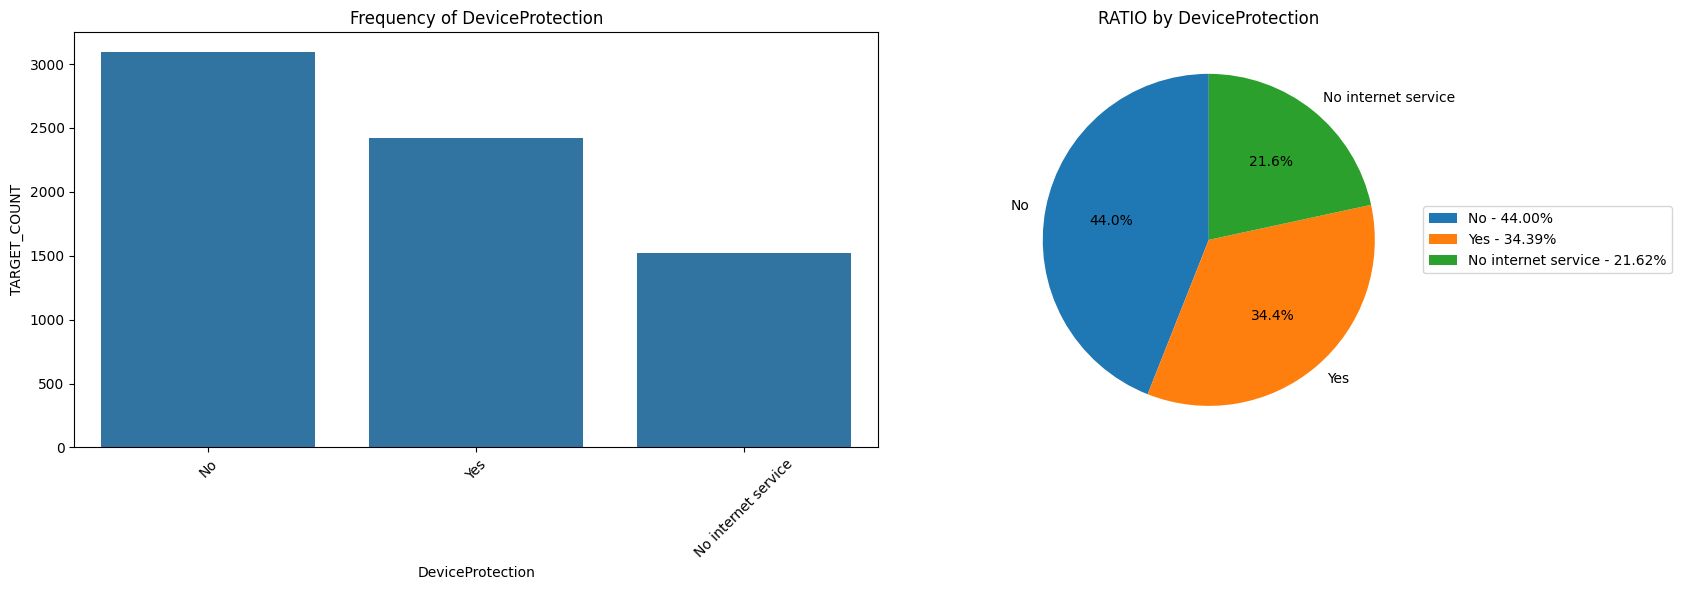

                     TechSupport      Ratio
TechSupport                                
No                          3472  49.374289
Yes                         2040  29.010239
No internet service         1520  21.615472
##########################################


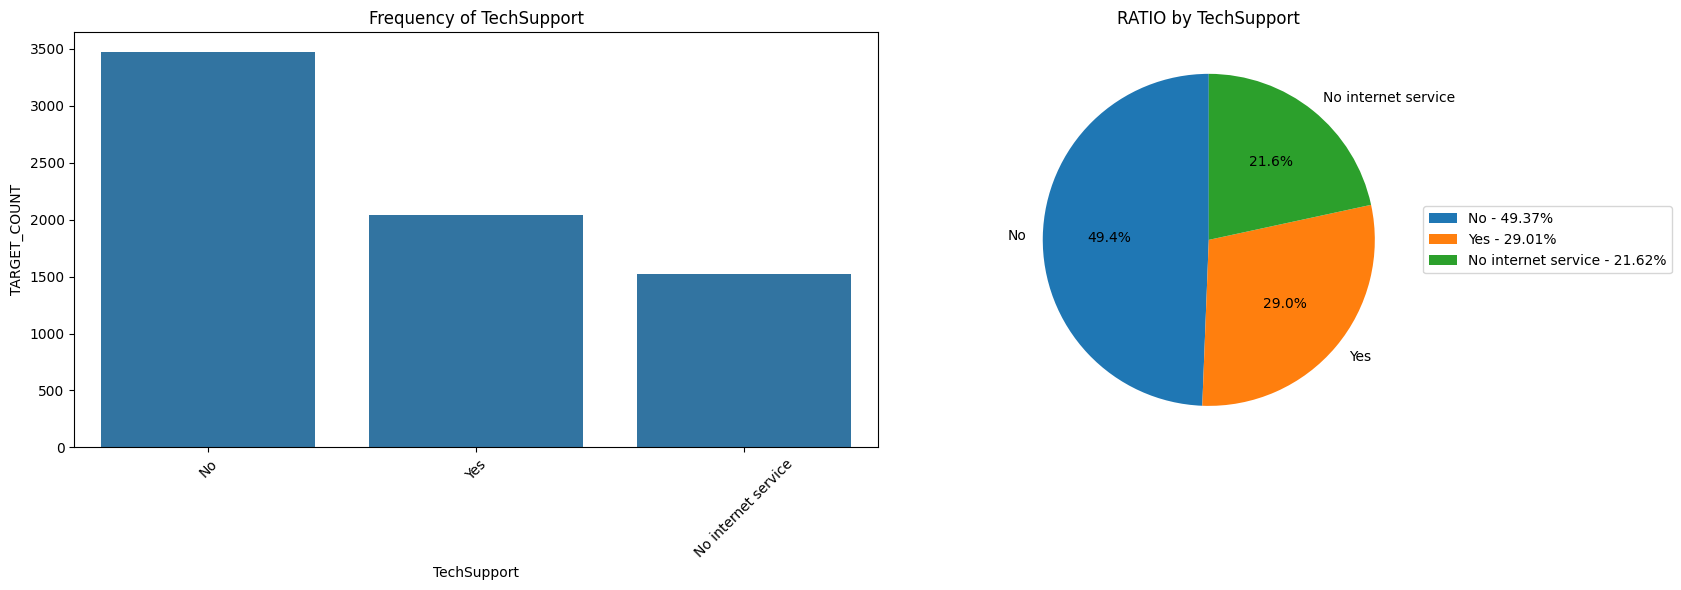

                     StreamingTV      Ratio
StreamingTV                                
No                          2809  39.945961
Yes                         2703  38.438567
No internet service         1520  21.615472
##########################################


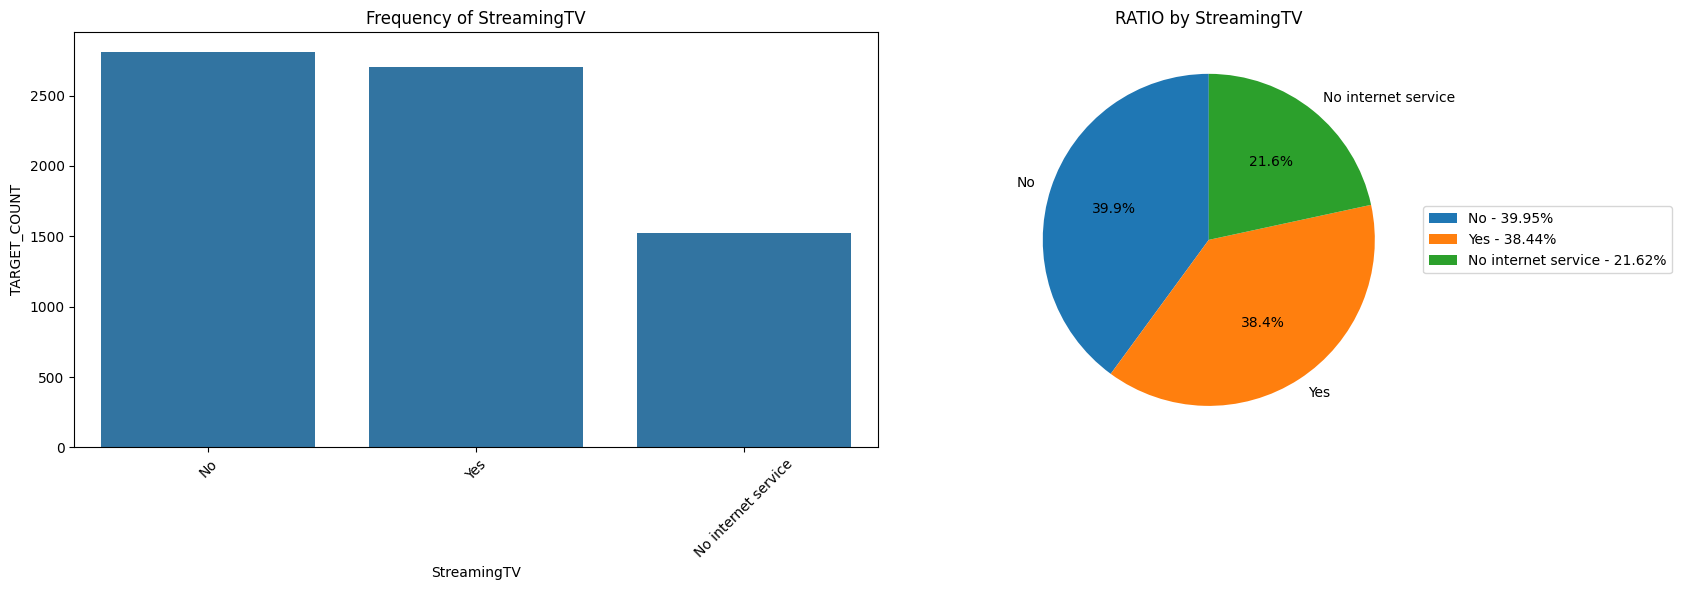

                     StreamingMovies      Ratio
StreamingMovies                                
No                              2781  39.547782
Yes                             2731  38.836746
No internet service             1520  21.615472
##########################################


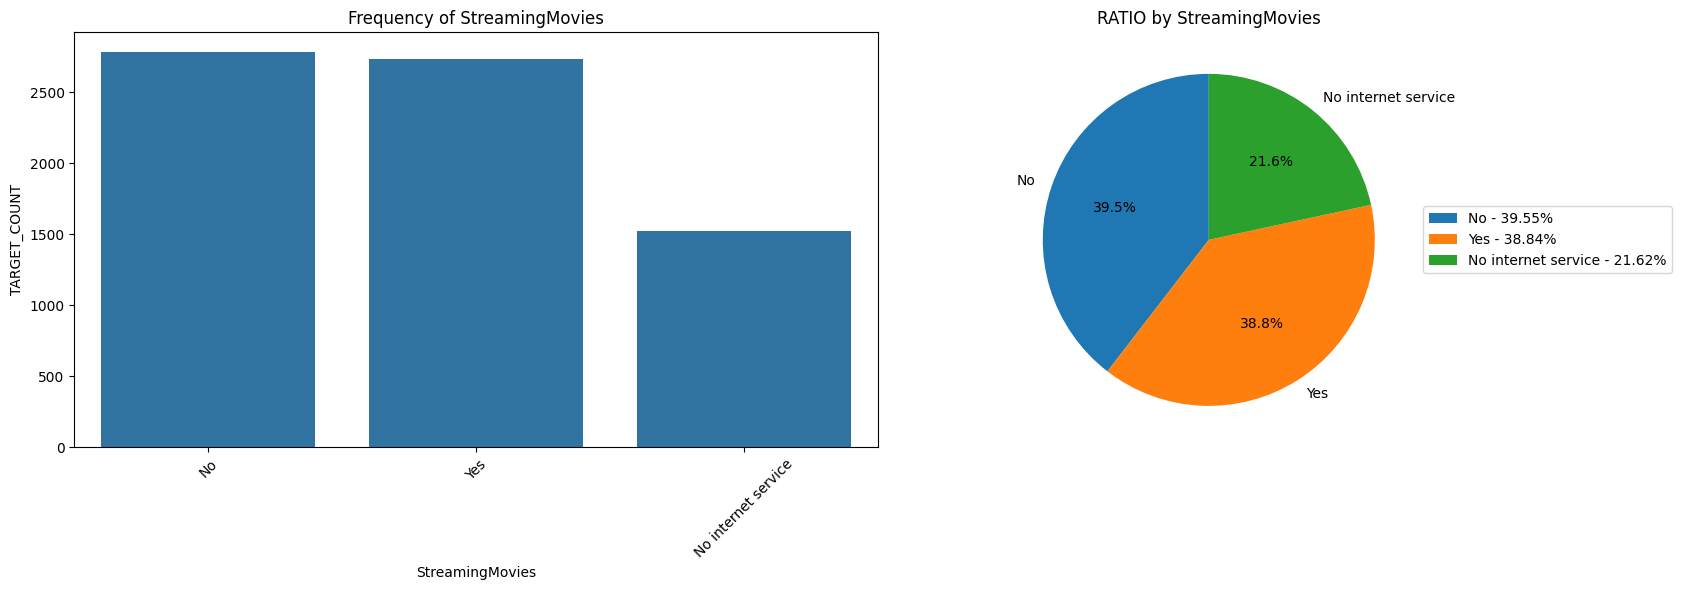

                Contract      Ratio
Contract                           
Month-to-month      3875  55.105233
Two year            1685  23.961889
One year            1472  20.932878
##########################################


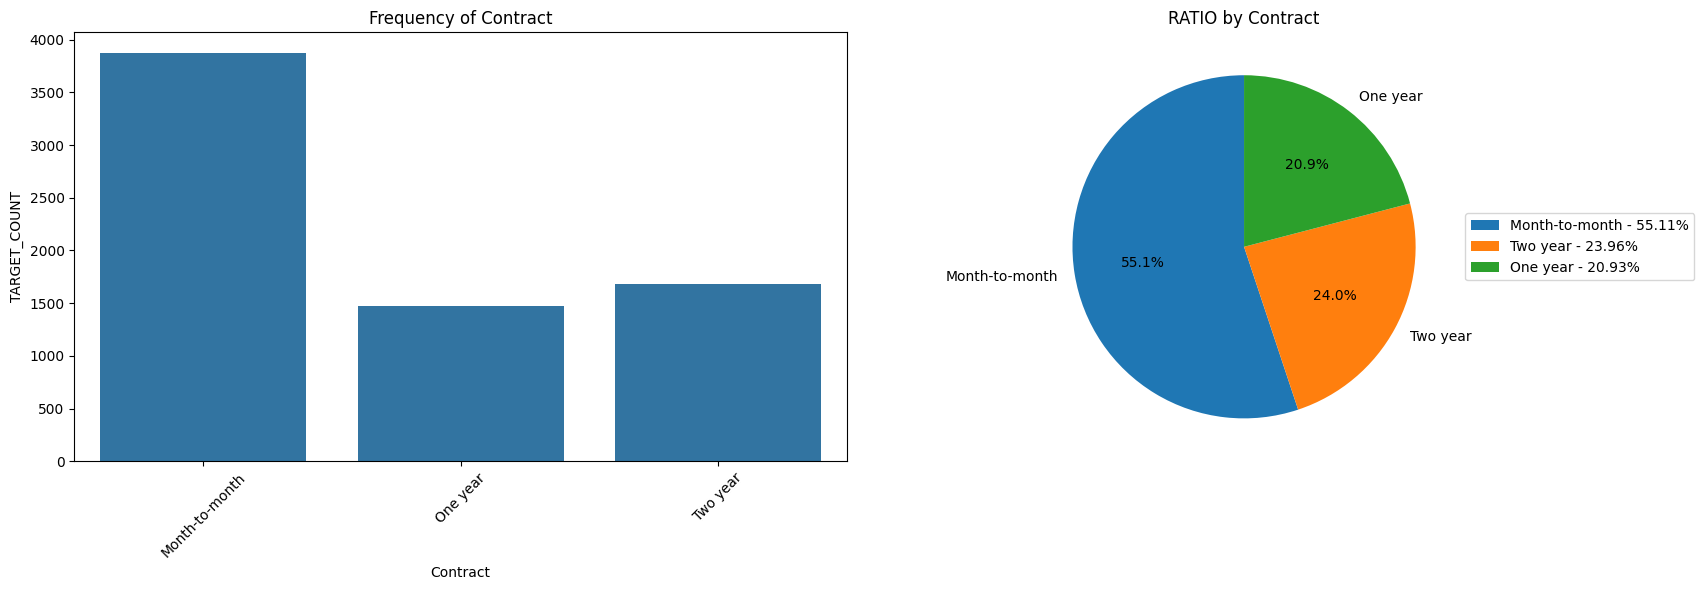

                  PaperlessBilling    Ratio
PaperlessBilling                           
Yes                           4168  59.2719
No                            2864  40.7281
##########################################


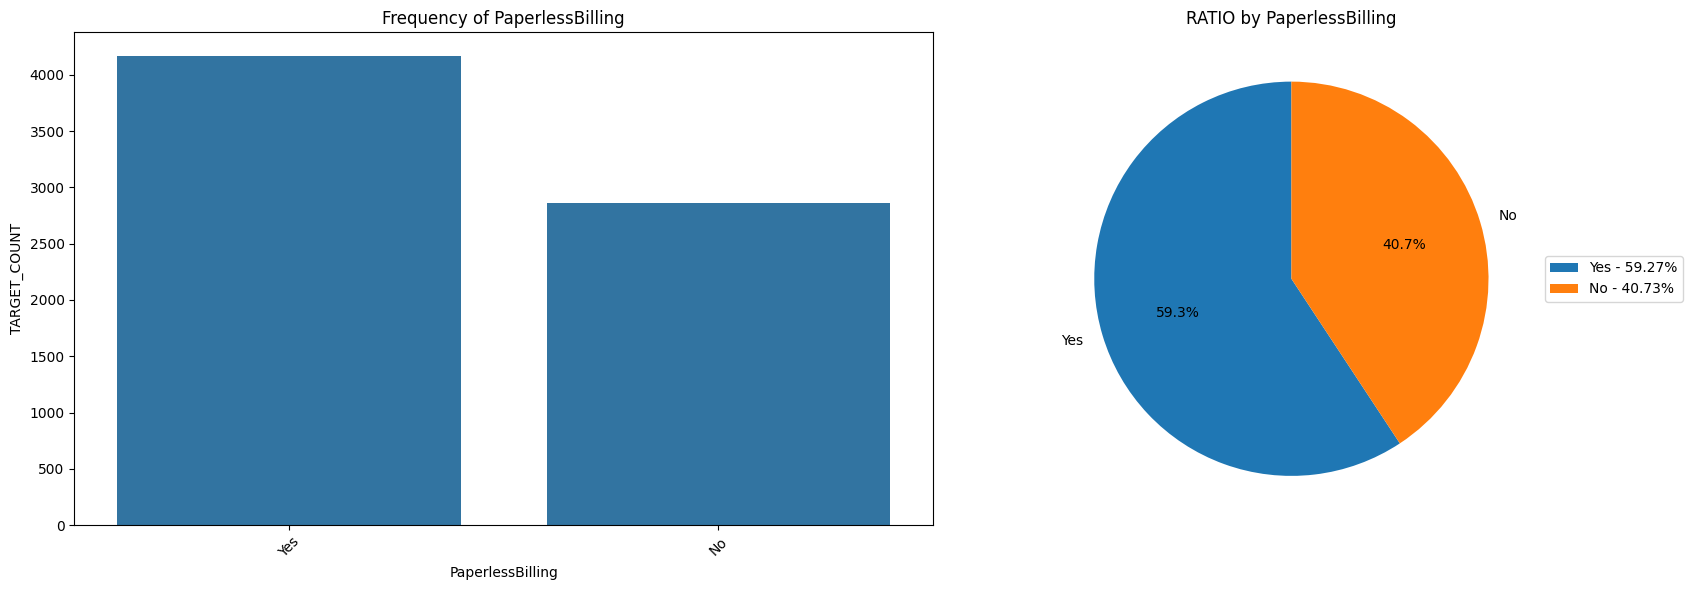

                           PaymentMethod      Ratio
PaymentMethod                                      
Electronic check                    2365  33.631968
Mailed check                        1604  22.810011
Bank transfer (automatic)           1542  21.928328
Credit card (automatic)             1521  21.629693
##########################################


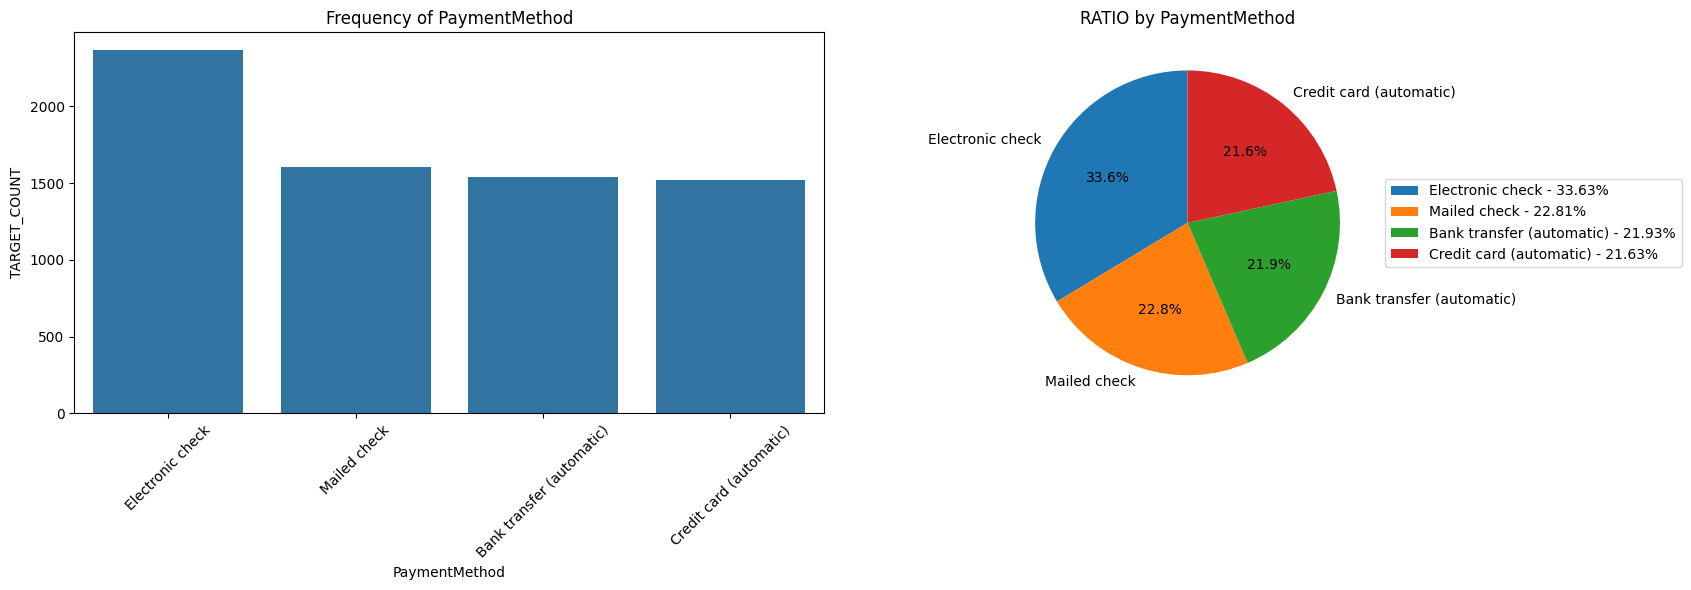

               SeniorCitizen      Ratio
SeniorCitizen                          
0                       5890  83.759954
1                       1142  16.240046
##########################################


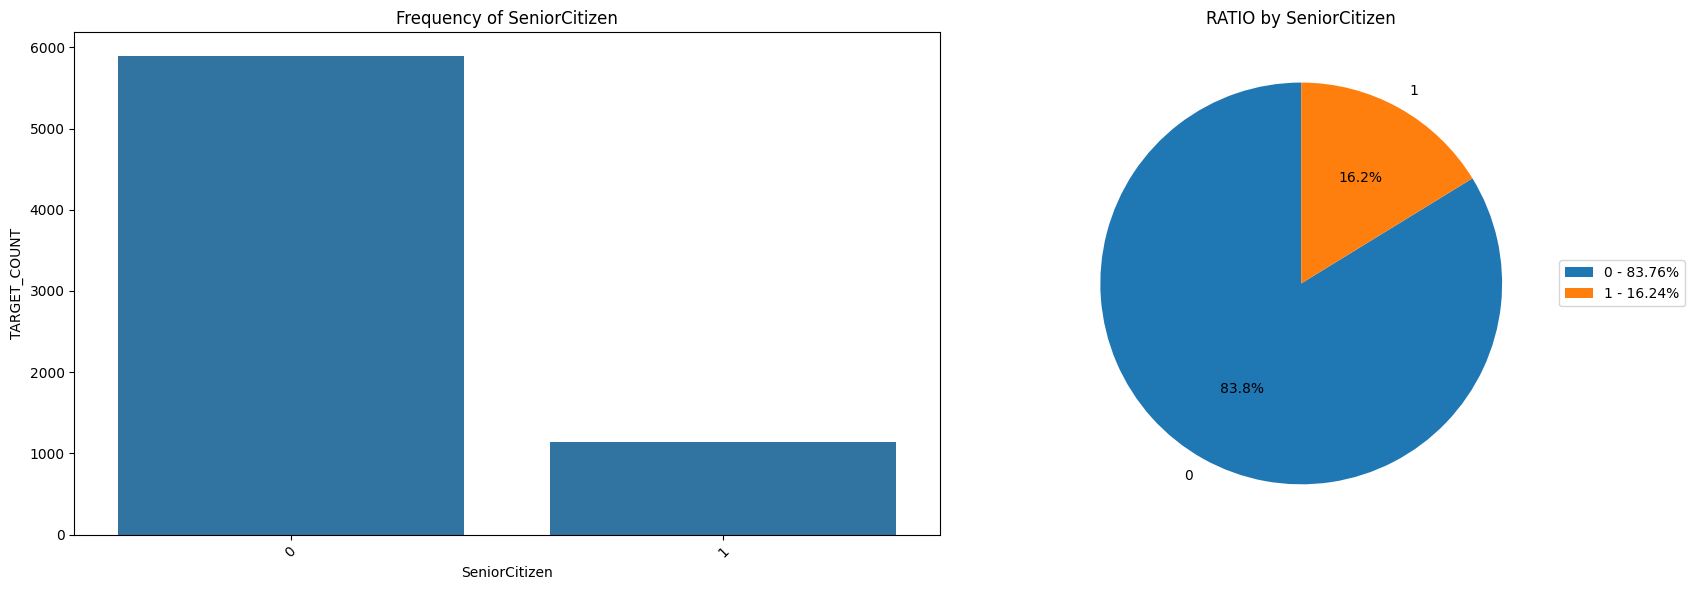

       Churn      Ratio
Churn                  
0       5163  73.421502
1       1869  26.578498
##########################################


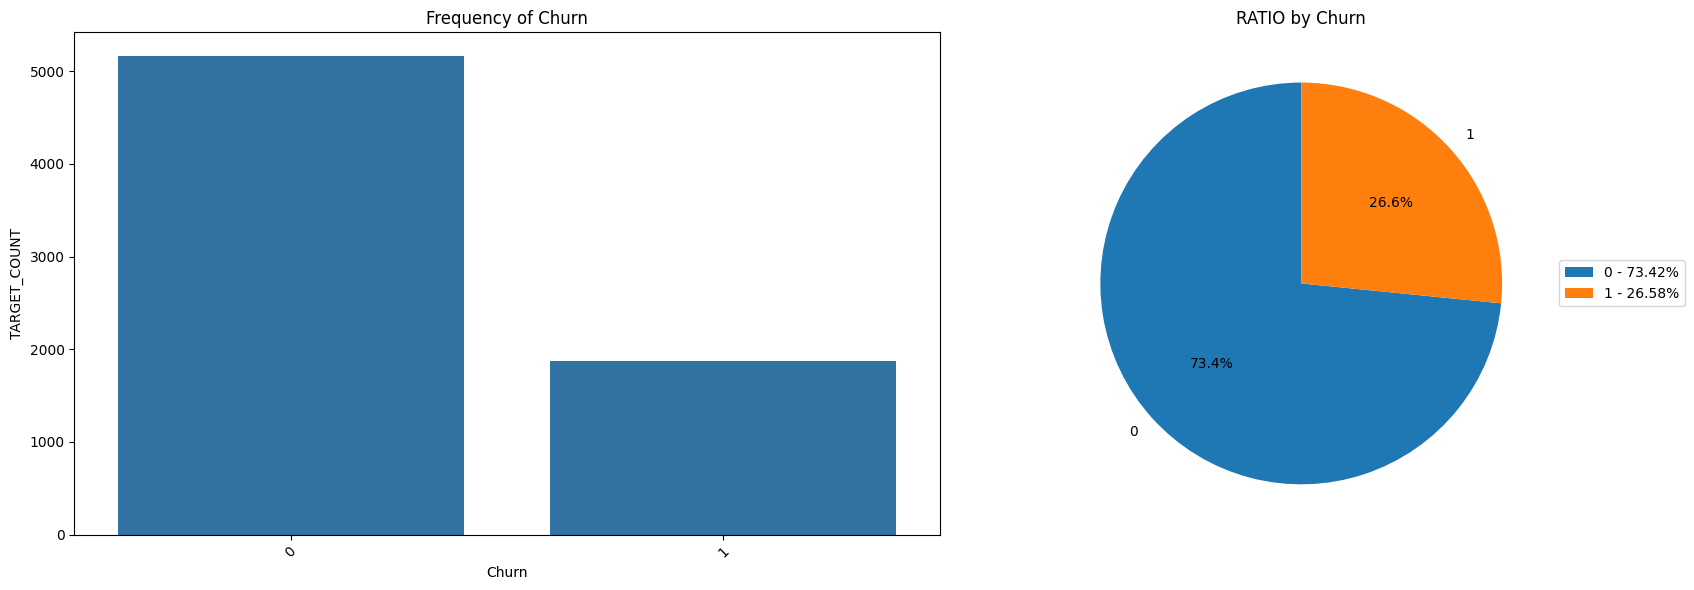

In [21]:


for col in cat_cols:
    cat_summary(df, col, plot=True)



In [22]:
def num_summary(dataframe, numerical_col, plot=False, hist_bins=20):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(numerical_col)
    print("##########################################")
    print(dataframe[numerical_col].describe(quantiles).T)
    print("##########################################")

    if plot:
        fig, axs = plt.subplots(2, 2, figsize=(12, 10))
        
        # Histogram
        plt.subplot(2, 2, 1)
        dataframe[numerical_col].hist(bins=hist_bins)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + " Distribution")
        
        # Boxplot
        plt.subplot(2, 2, 2)
        sns.boxplot(y=numerical_col, data=dataframe)
        plt.title("Boxplot of " + numerical_col)
        plt.xticks(rotation=90)
        
        # Density Plot
        plt.subplot(2, 2, 3)
        sns.kdeplot(dataframe[numerical_col], fill=True)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + " Density")
        
        # QQ Plot
        plt.subplot(2, 2, 4)
        stats.probplot(dataframe[numerical_col], dist="norm", plot=plt)
        plt.title(numerical_col + " QQ Plot")
        
        plt.tight_layout()
        plt.show(block=True)

tenure
##########################################
count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.800000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64
##########################################


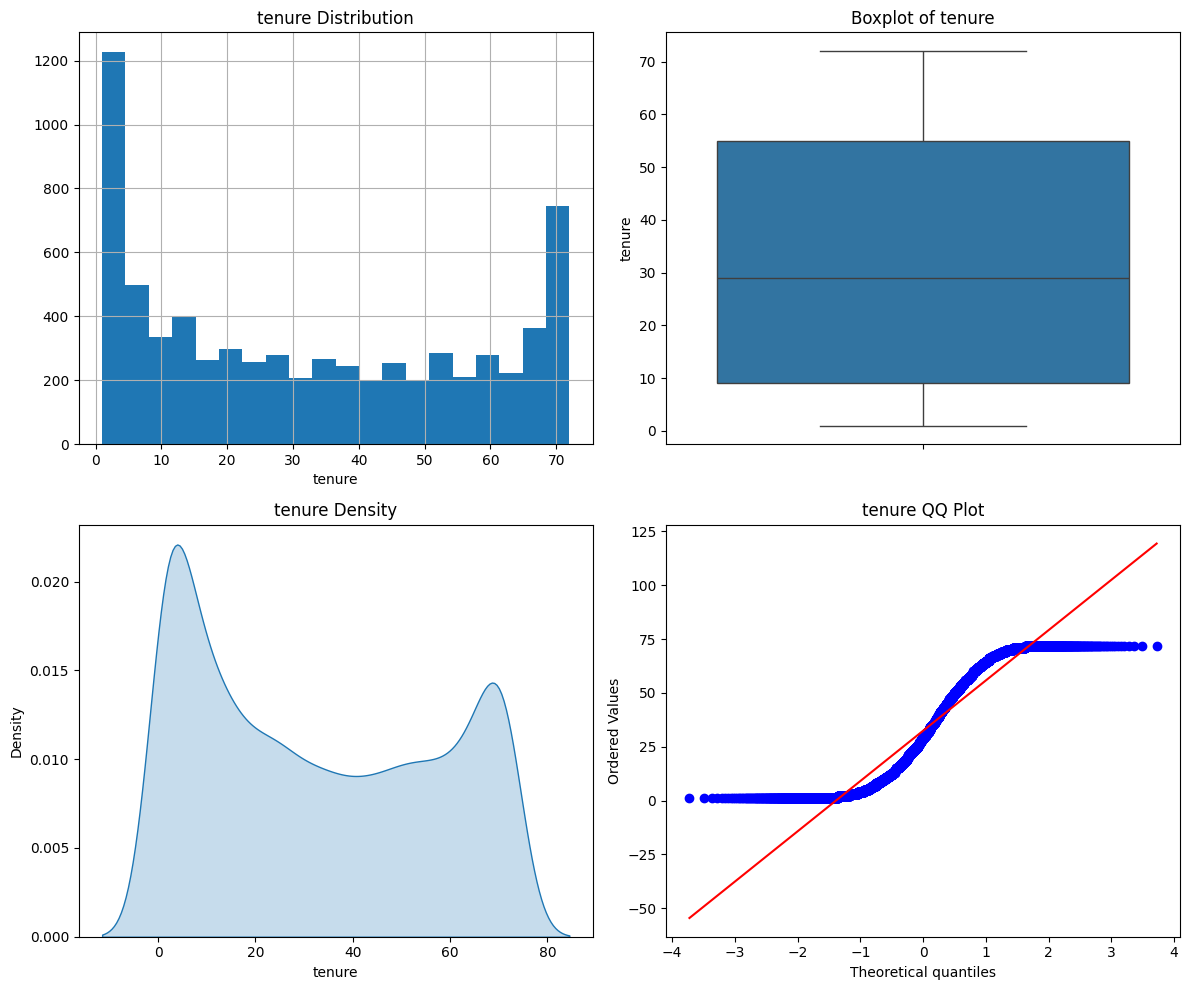

MonthlyCharges
##########################################
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.900000
40%        58.920000
50%        70.350000
60%        79.150000
70%        85.535000
80%        94.300000
90%       102.645000
95%       107.422500
99%       114.734500
max       118.750000
Name: MonthlyCharges, dtype: float64
##########################################


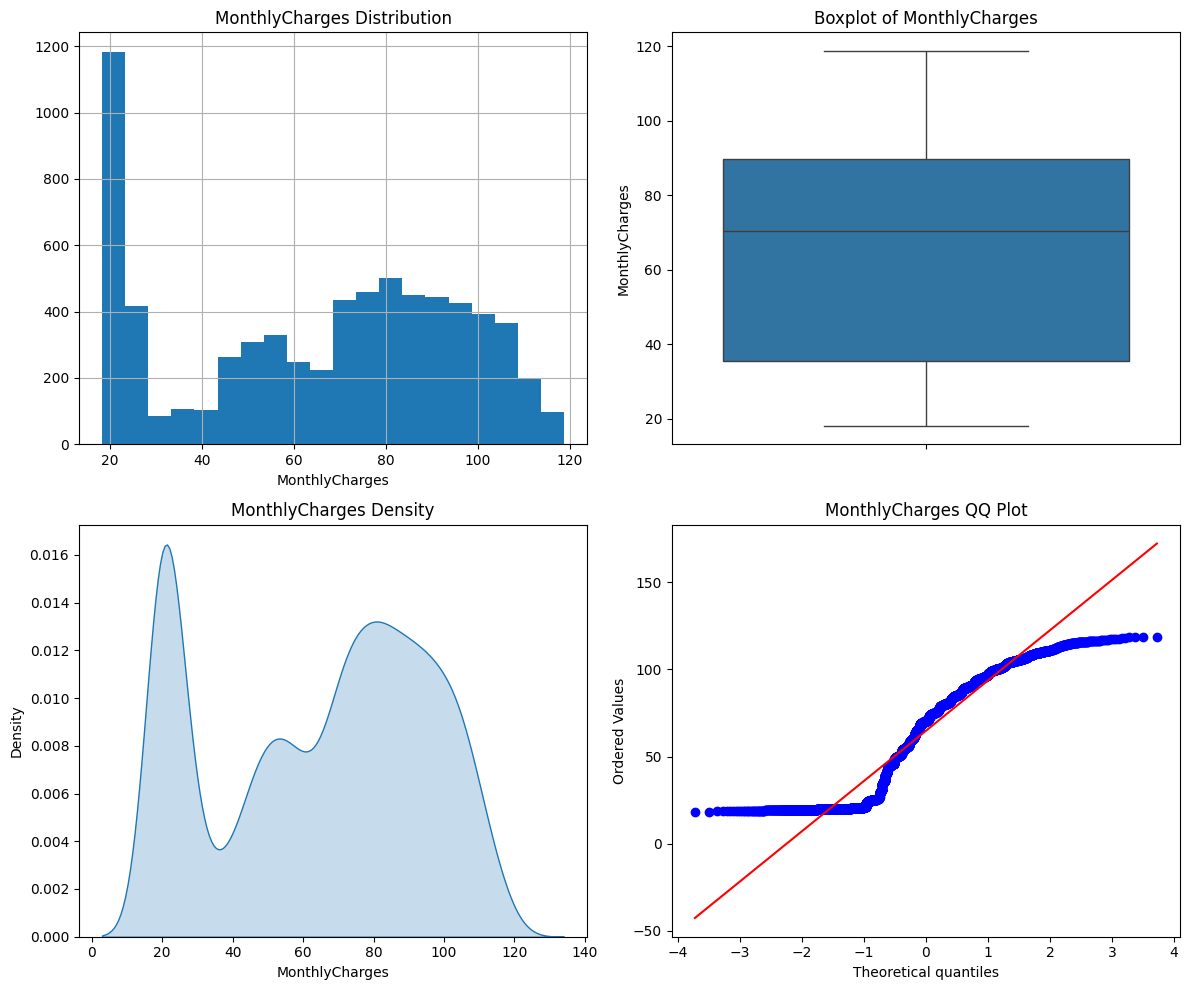

TotalCharges
##########################################
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
5%         49.605000
10%        84.600000
20%       267.070000
30%       551.995000
40%       944.170000
50%      1397.475000
60%      2048.950000
70%      3141.130000
80%      4475.410000
90%      5976.640000
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64
##########################################


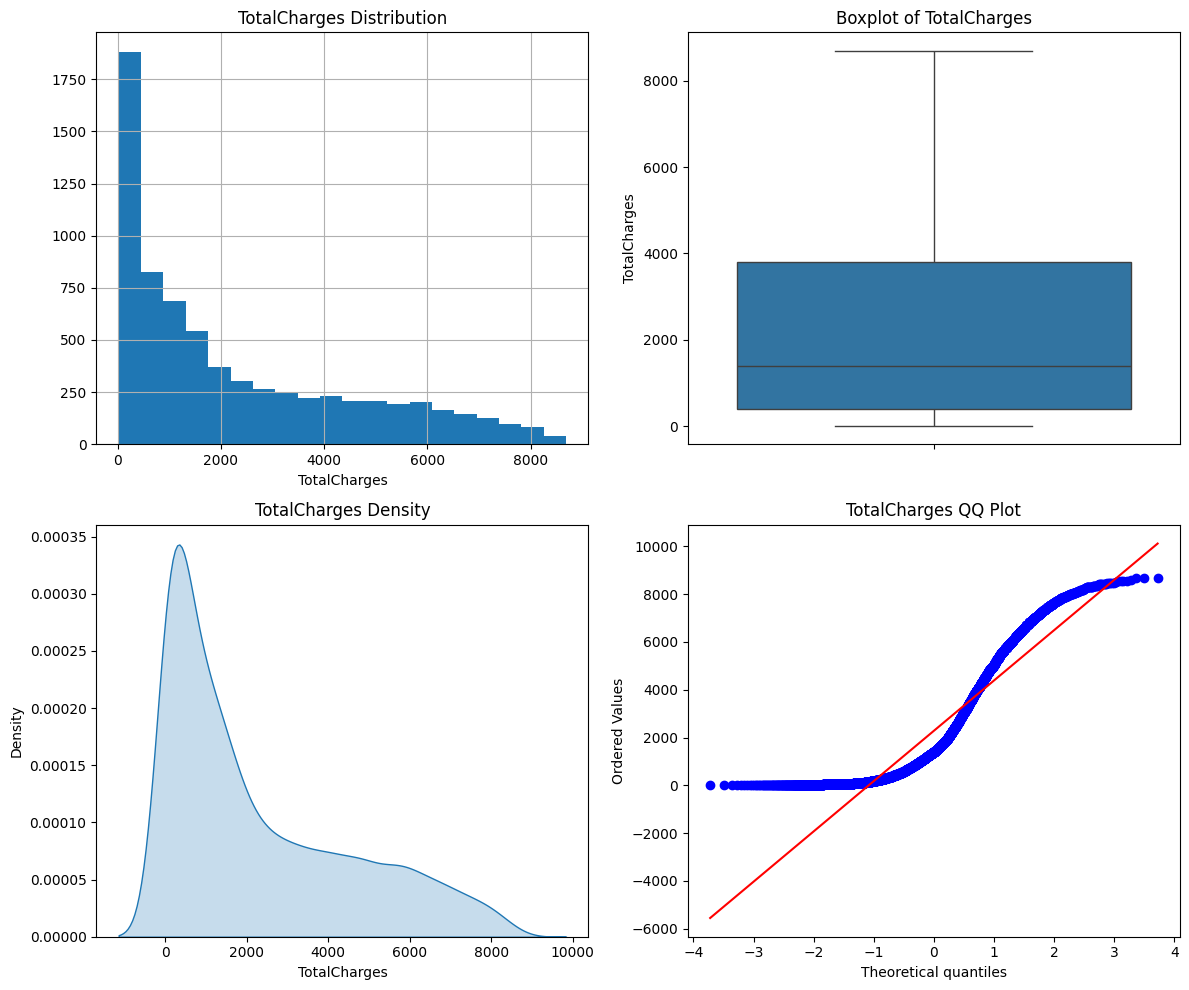

In [23]:
for col in num_cols:
    num_summary(df, col, plot=True)

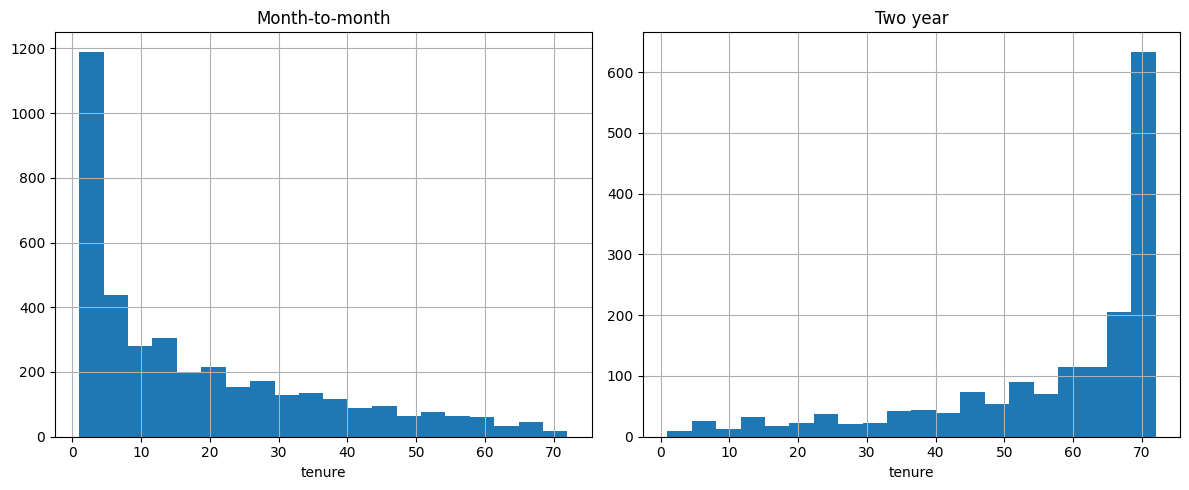

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

df[df["Contract"] == "Month-to-month"]["tenure"].hist(bins=20, ax=ax1)
ax1.set_xlabel("tenure")
ax1.set_title("Month-to-month")

df[df["Contract"] == "Two year"]["tenure"].hist(bins=20, ax=ax2)
ax2.set_xlabel("tenure")
ax2.set_title("Two year")

plt.tight_layout()
plt.show()

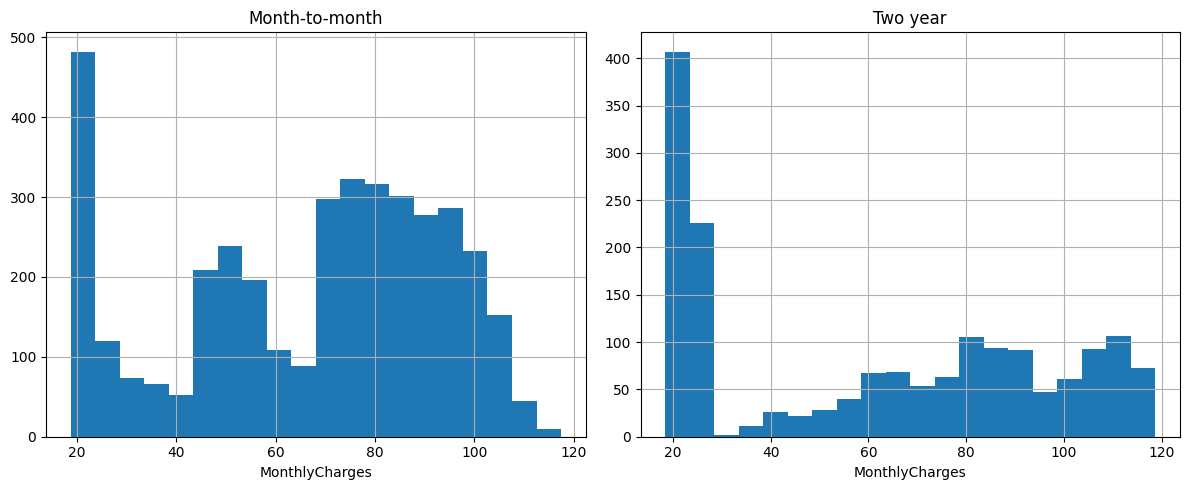

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

df[df["Contract"] == "Month-to-month"]["MonthlyCharges"].hist(bins=20, ax=ax1)
ax1.set_xlabel("MonthlyCharges")
ax1.set_title("Month-to-month")

df[df["Contract"] == "Two year"]["MonthlyCharges"].hist(bins=20, ax=ax2)
ax2.set_xlabel("MonthlyCharges")
ax2.set_title("Two year")

plt.tight_layout()
plt.show()

In [26]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    summary = pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                            "TARGET_COUNT": dataframe.groupby(categorical_col)[target].count(),
                            "RATIO": 100 * dataframe[categorical_col].value_counts() / len(dataframe)})
    
    print(summary, end="\n\n\n")
    print("##########################################")

    if plot:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
        
        # TARGET_MEAN
        summary["TARGET_MEAN"].plot(kind="bar", ax=ax1)
        ax1.set_title(f"TARGET_MEAN by {categorical_col}")
        ax1.set_ylabel("TARGET_MEAN")
        ax1.tick_params(axis="x", rotation=45)
        
        # TARGET_COUNT
        sns.countplot(x=categorical_col, data=dataframe, ax=ax2)
        ax2.set_title(f"Frequency of {categorical_col}")
        ax2.set_ylabel("TARGET_COUNT")
        ax2.tick_params(axis="x", rotation=45)
        
        # RATIO
        values = dataframe[categorical_col].value_counts()
        ax3.pie(x=values, labels=values.index, autopct="%1.1f%%", startangle=90)
        ax3.set_title(f"RATIO by {categorical_col}")
        ax3.legend(labels=[f"{index} - {value/sum(values)*100:.2f}%" for index, value in zip(values.index, values)],
                   loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        
        plt.tight_layout()
        plt.show(block=True)

        TARGET_MEAN  TARGET_COUNT      RATIO
gender                                      
Female     0.269595          3483  49.530717
Male       0.262046          3549  50.469283


##########################################


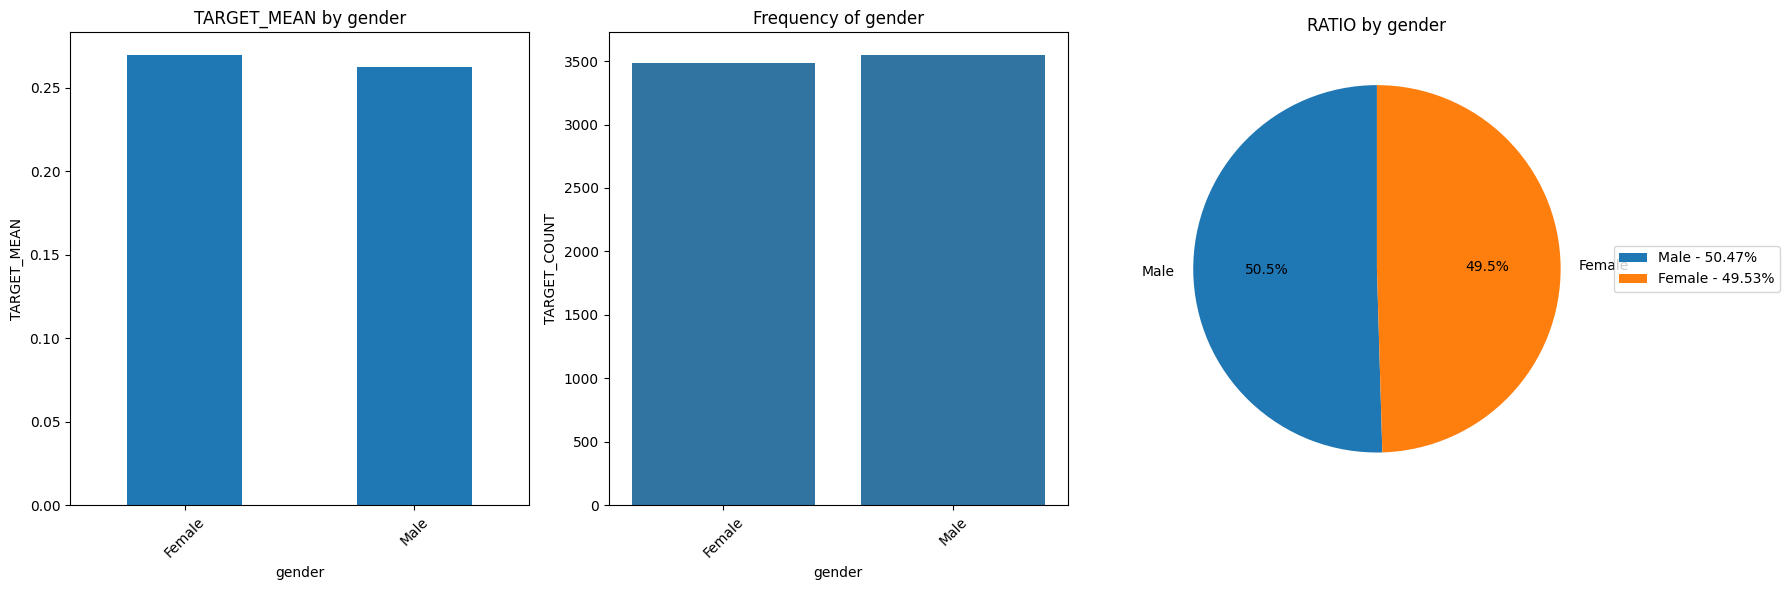

         TARGET_MEAN  TARGET_COUNT      RATIO
Partner                                      
No          0.329761          3639  51.749147
Yes         0.197171          3393  48.250853


##########################################


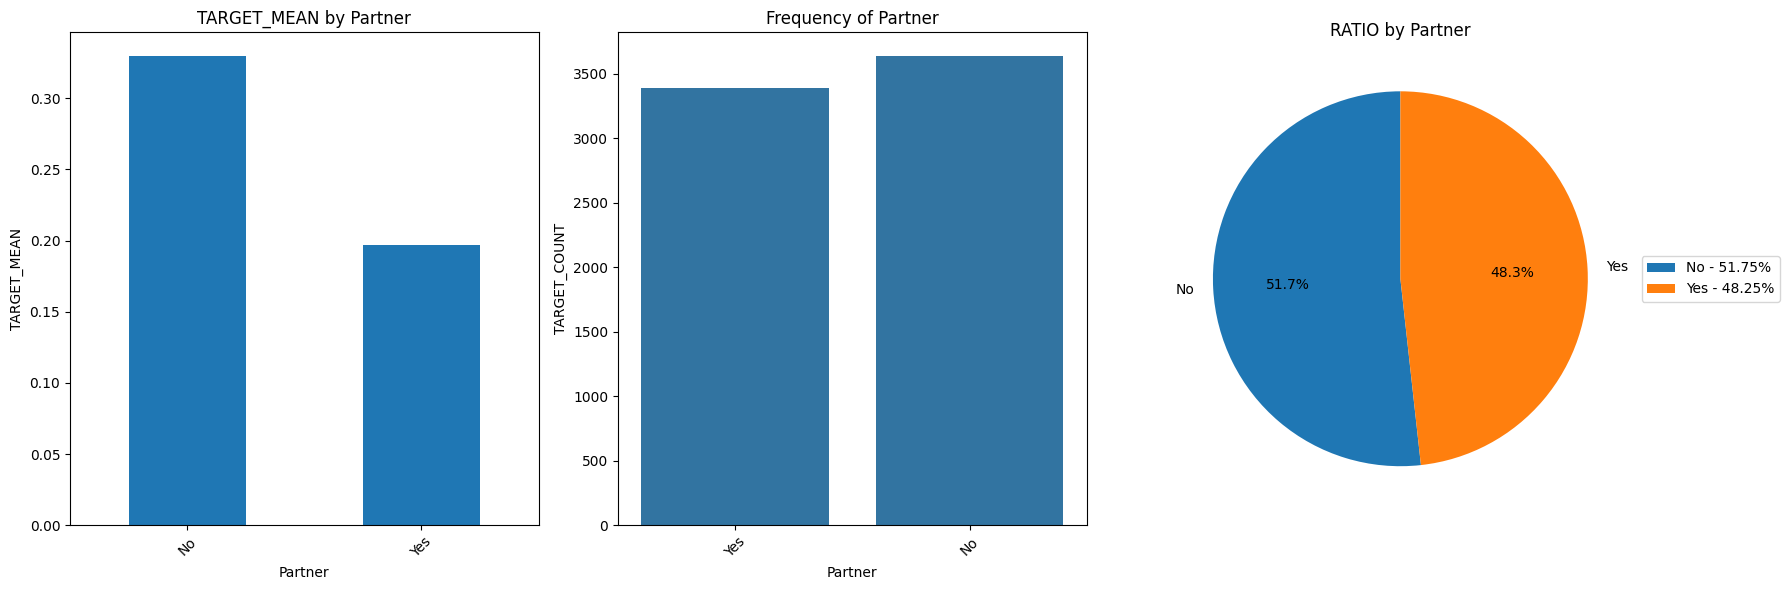

            TARGET_MEAN  TARGET_COUNT      RATIO
Dependents                                      
No             0.312791          4933  70.150739
Yes            0.155312          2099  29.849261


##########################################


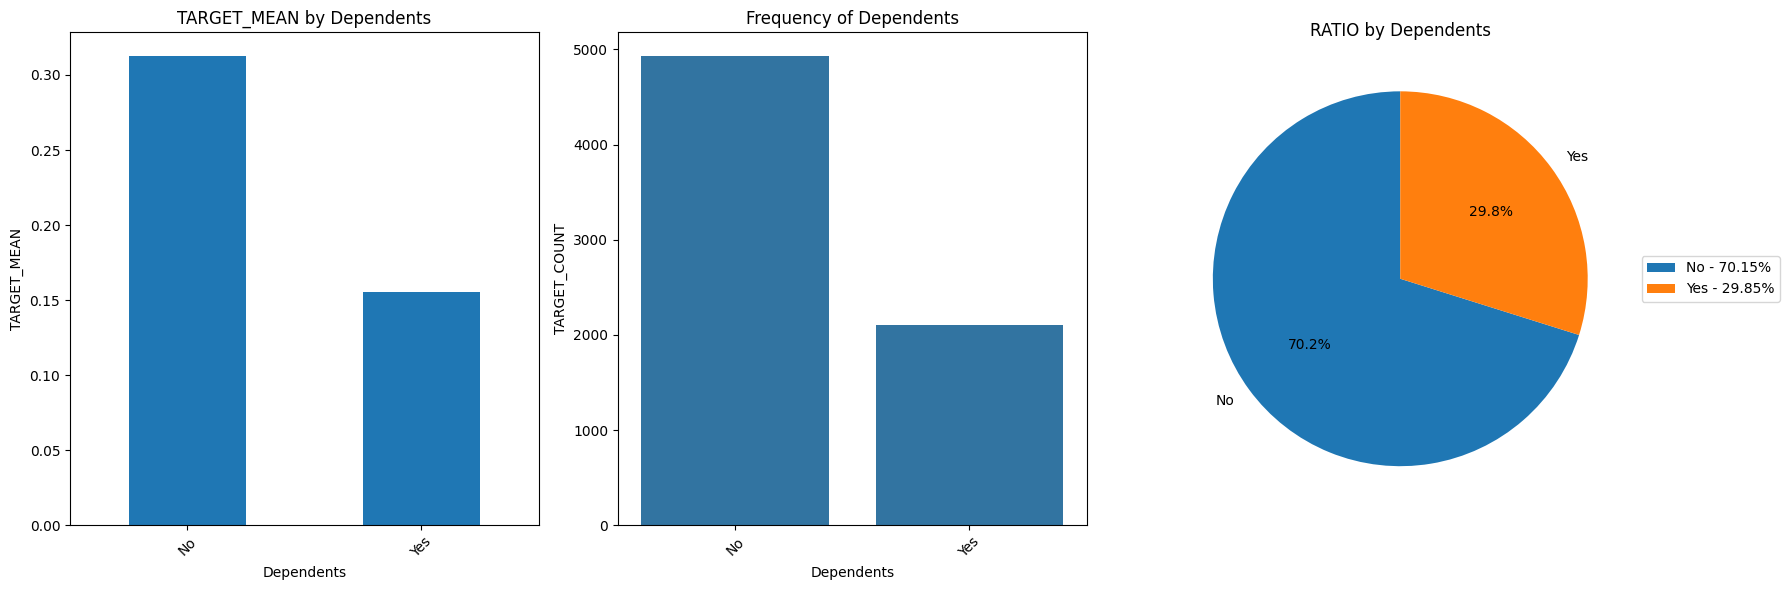

              TARGET_MEAN  TARGET_COUNT     RATIO
PhoneService                                     
No               0.250000           680   9.67008
Yes              0.267475          6352  90.32992


##########################################


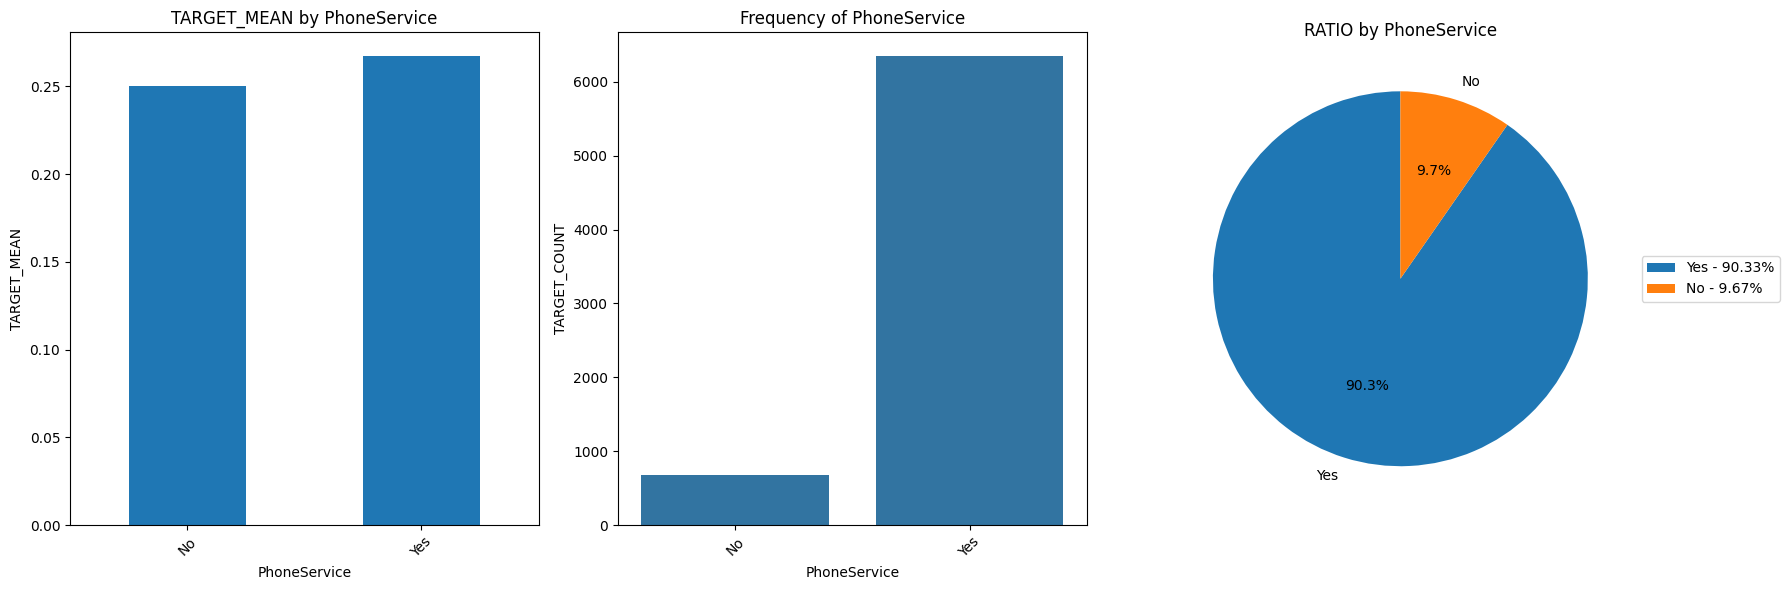

                  TARGET_MEAN  TARGET_COUNT      RATIO
MultipleLines                                         
No                   0.250812          3385  48.137088
No phone service     0.250000           680   9.670080
Yes                  0.286485          2967  42.192833


##########################################


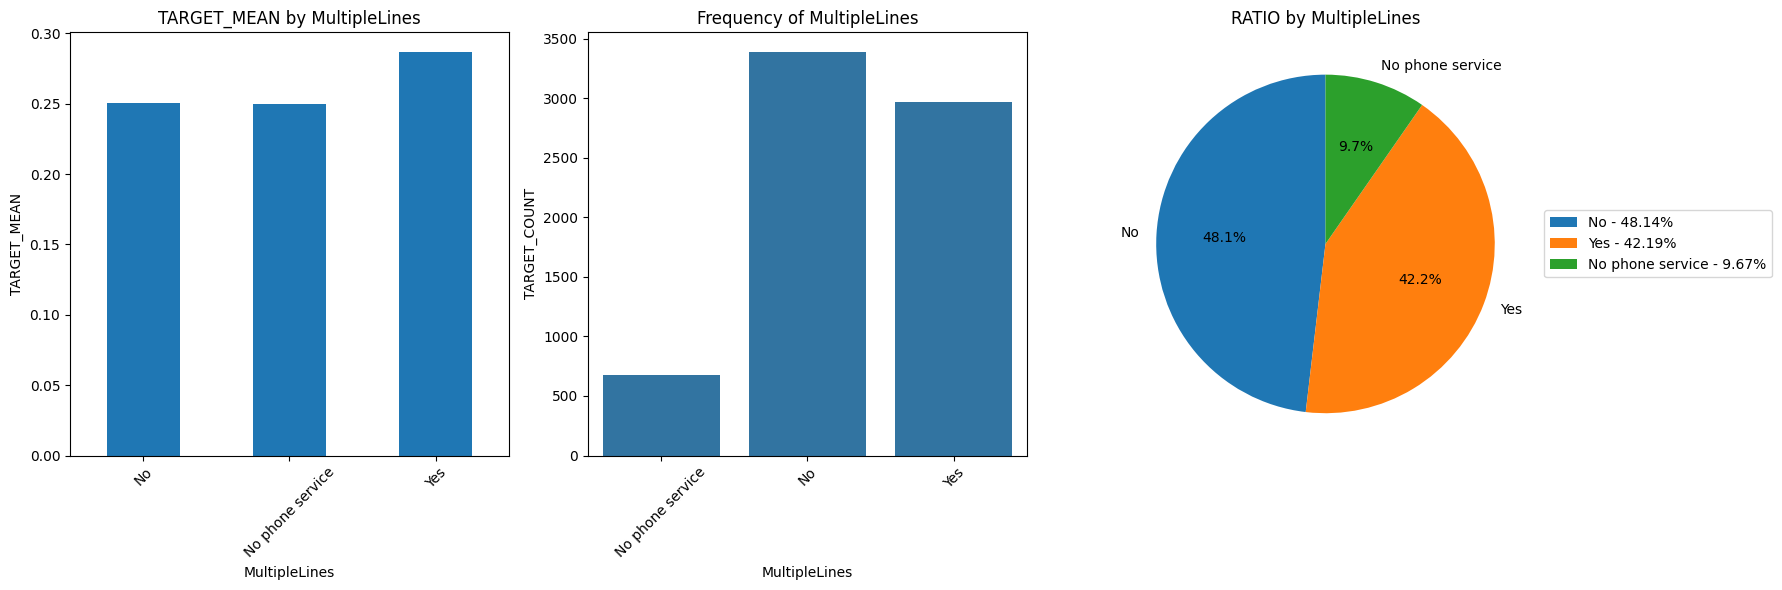

                 TARGET_MEAN  TARGET_COUNT      RATIO
InternetService                                      
DSL                 0.189983          2416  34.357224
Fiber optic         0.418928          3096  44.027304
No                  0.074342          1520  21.615472


##########################################


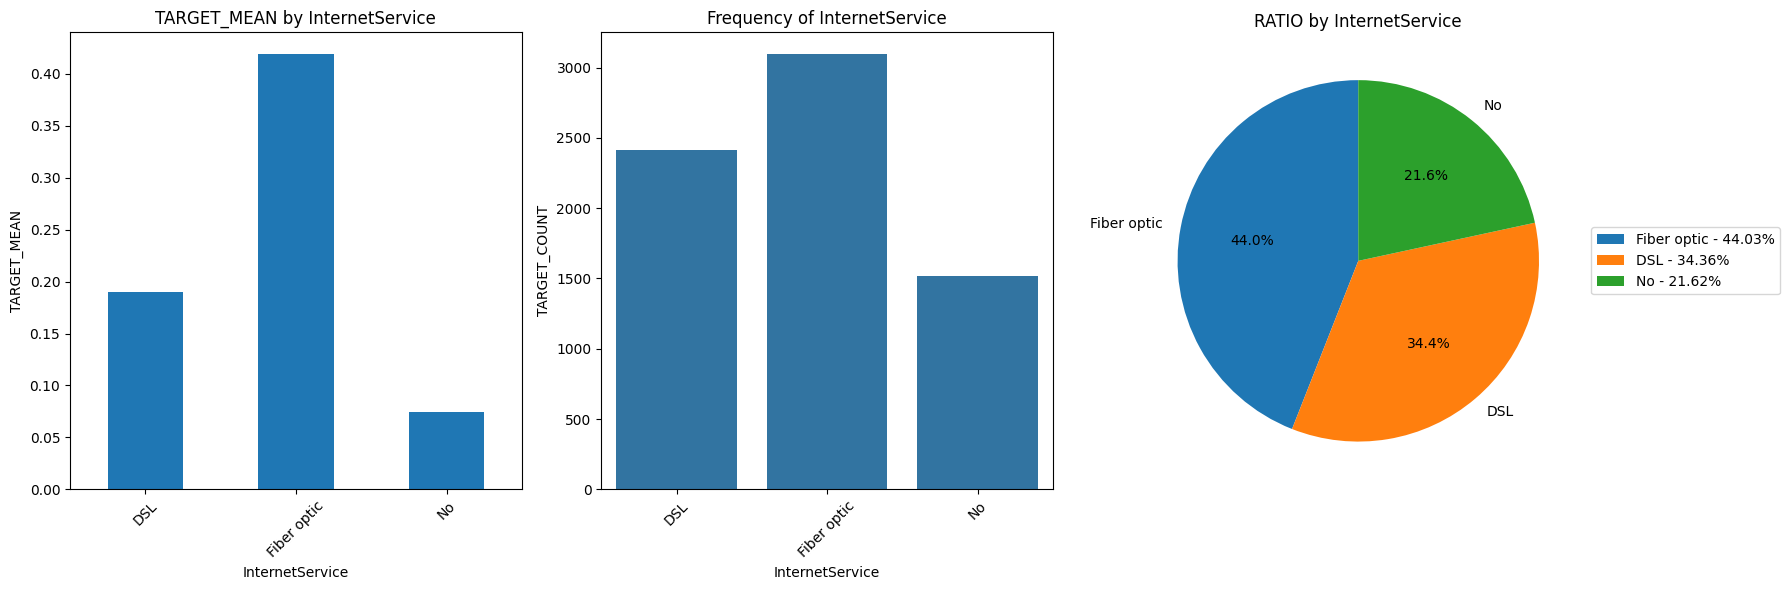

                     TARGET_MEAN  TARGET_COUNT      RATIO
OnlineSecurity                                           
No                      0.417787          3497  49.729807
No internet service     0.074342          1520  21.615472
Yes                     0.146402          2015  28.654721


##########################################


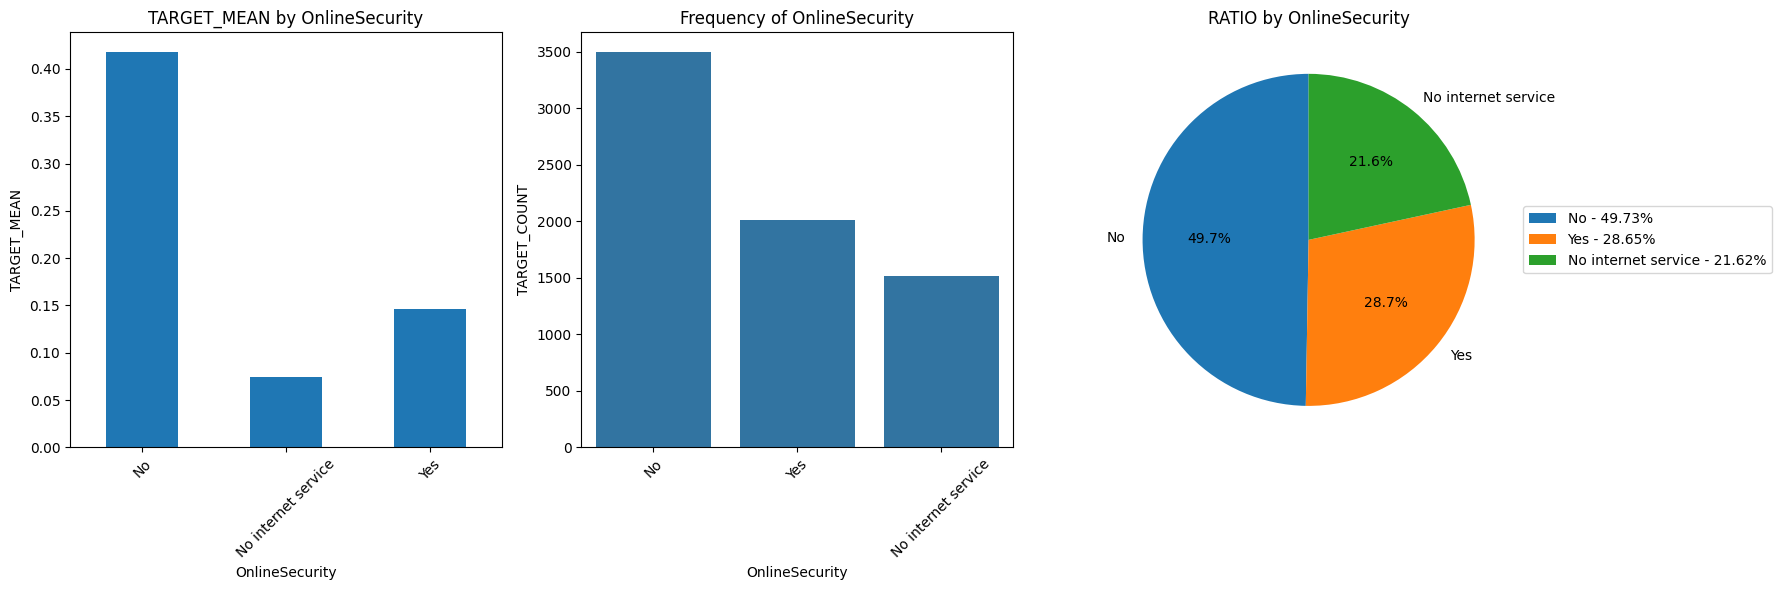

                     TARGET_MEAN  TARGET_COUNT      RATIO
OnlineBackup                                             
No                      0.399417          3087  43.899317
No internet service     0.074342          1520  21.615472
Yes                     0.215670          2425  34.485210


##########################################


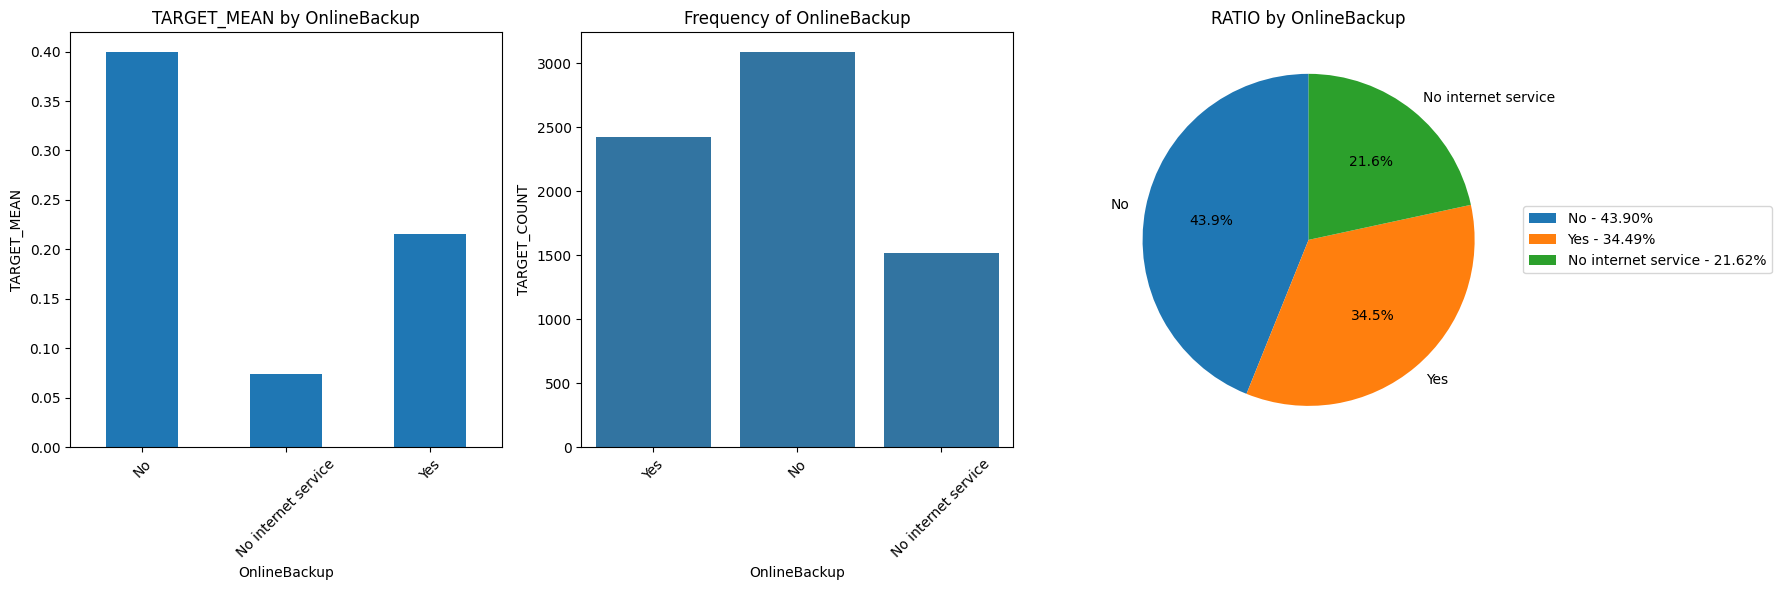

                     TARGET_MEAN  TARGET_COUNT      RATIO
DeviceProtection                                         
No                      0.391403          3094  43.998862
No internet service     0.074342          1520  21.615472
Yes                     0.225393          2418  34.385666


##########################################


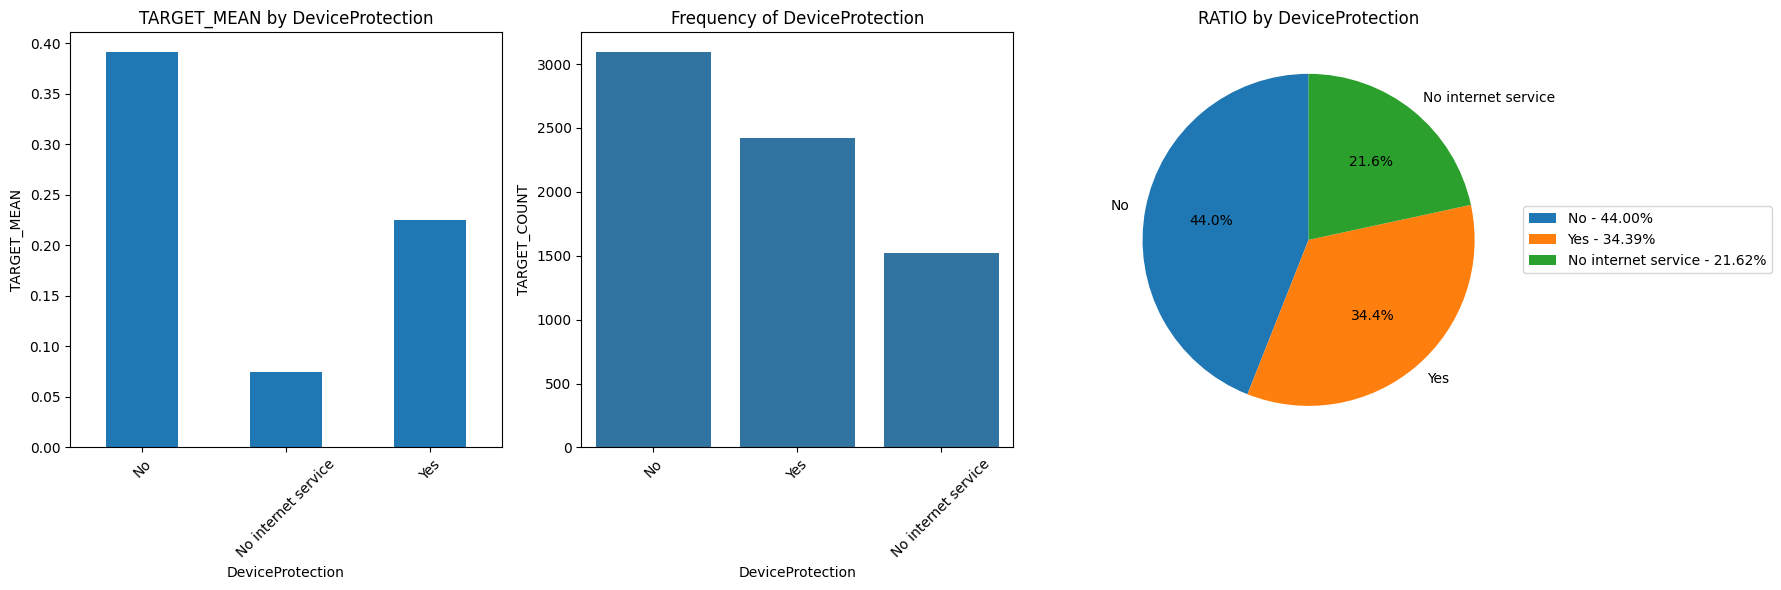

                     TARGET_MEAN  TARGET_COUNT      RATIO
TechSupport                                              
No                      0.416475          3472  49.374289
No internet service     0.074342          1520  21.615472
Yes                     0.151961          2040  29.010239


##########################################


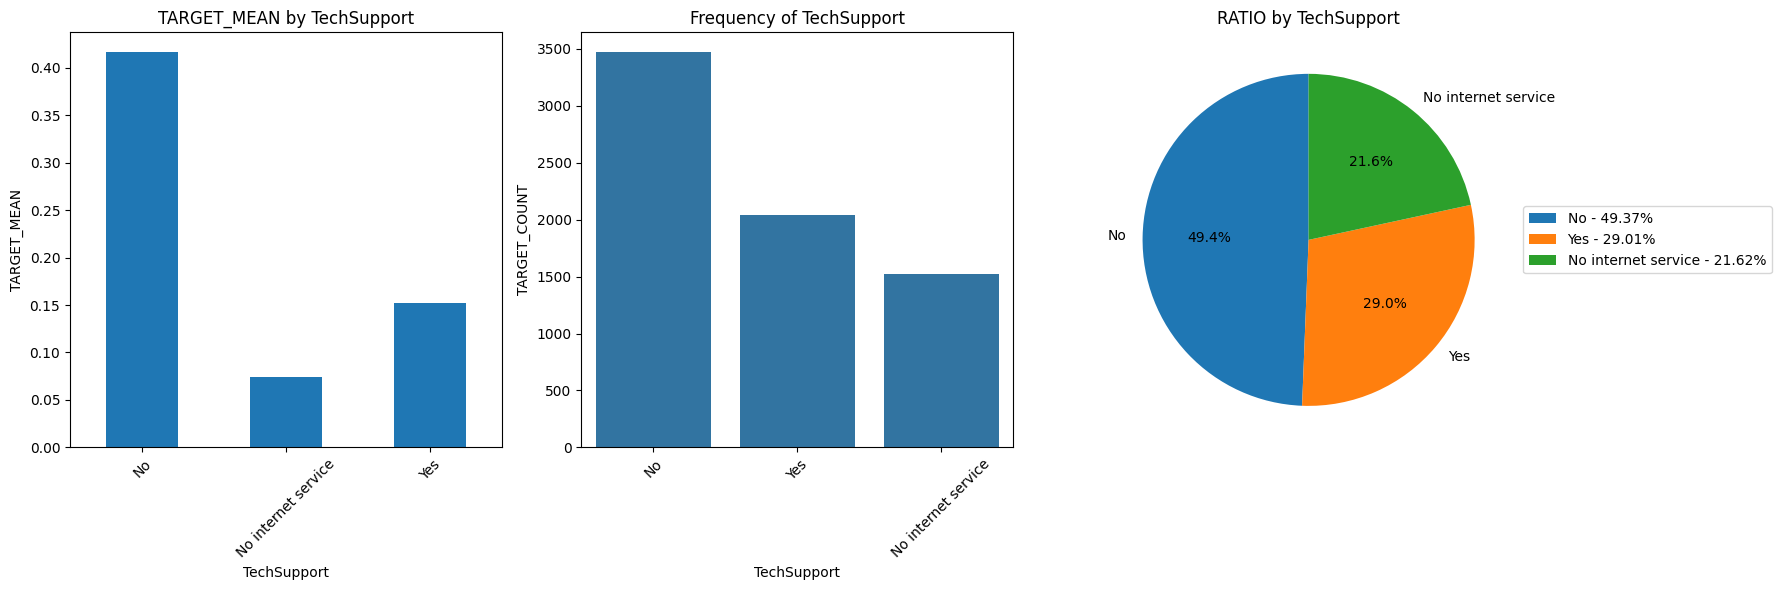

                     TARGET_MEAN  TARGET_COUNT      RATIO
StreamingTV                                              
No                      0.335351          2809  39.945961
No internet service     0.074342          1520  21.615472
Yes                     0.301147          2703  38.438567


##########################################


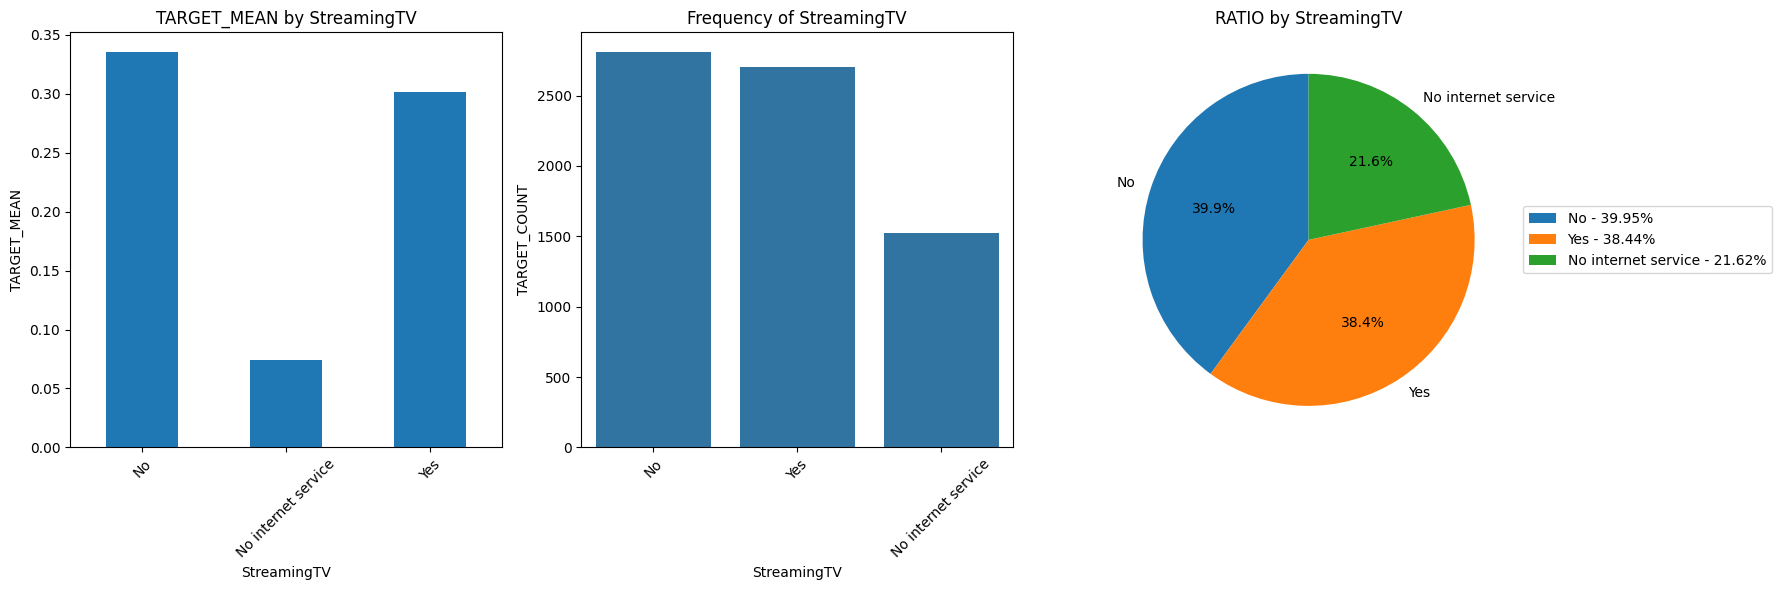

                     TARGET_MEAN  TARGET_COUNT      RATIO
StreamingMovies                                          
No                      0.337289          2781  39.547782
No internet service     0.074342          1520  21.615472
Yes                     0.299524          2731  38.836746


##########################################


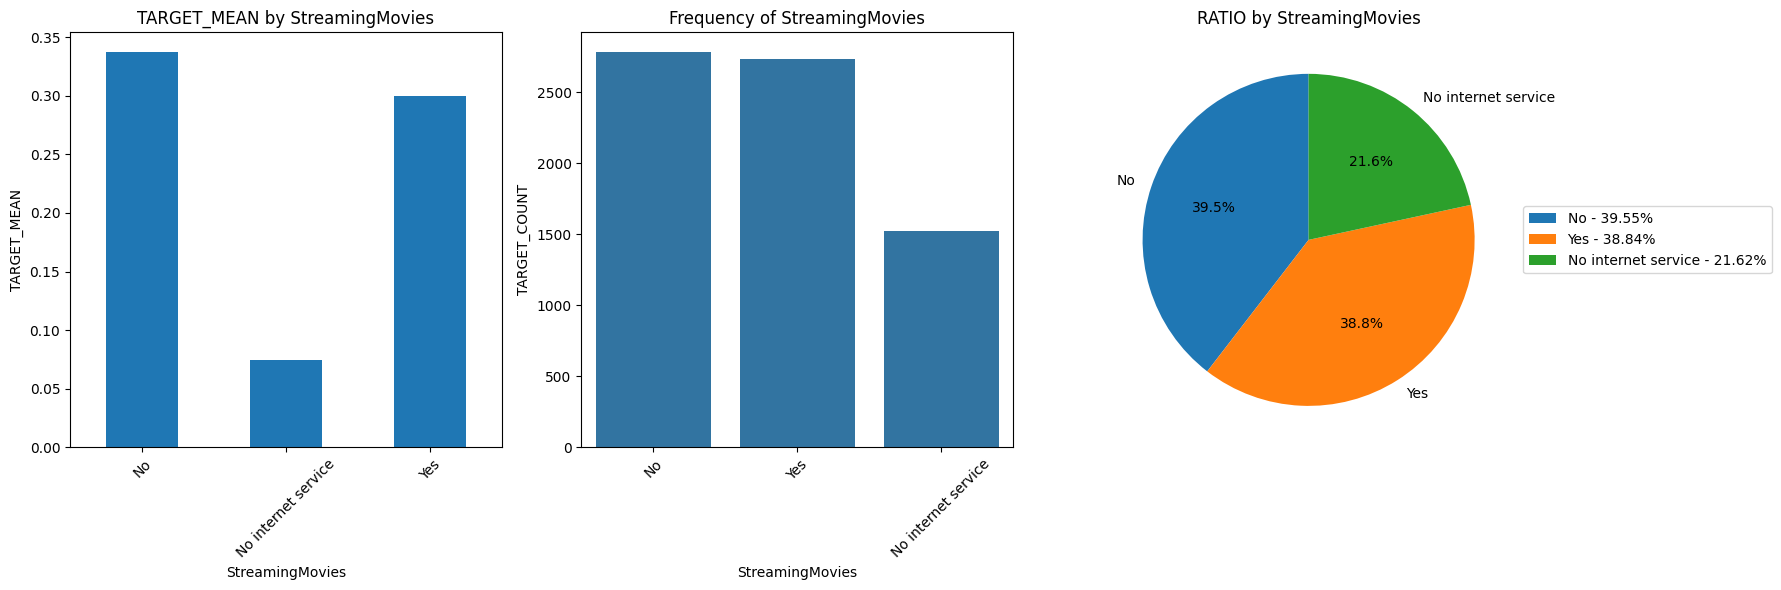

                TARGET_MEAN  TARGET_COUNT      RATIO
Contract                                            
Month-to-month     0.427097          3875  55.105233
One year           0.112772          1472  20.932878
Two year           0.028487          1685  23.961889


##########################################


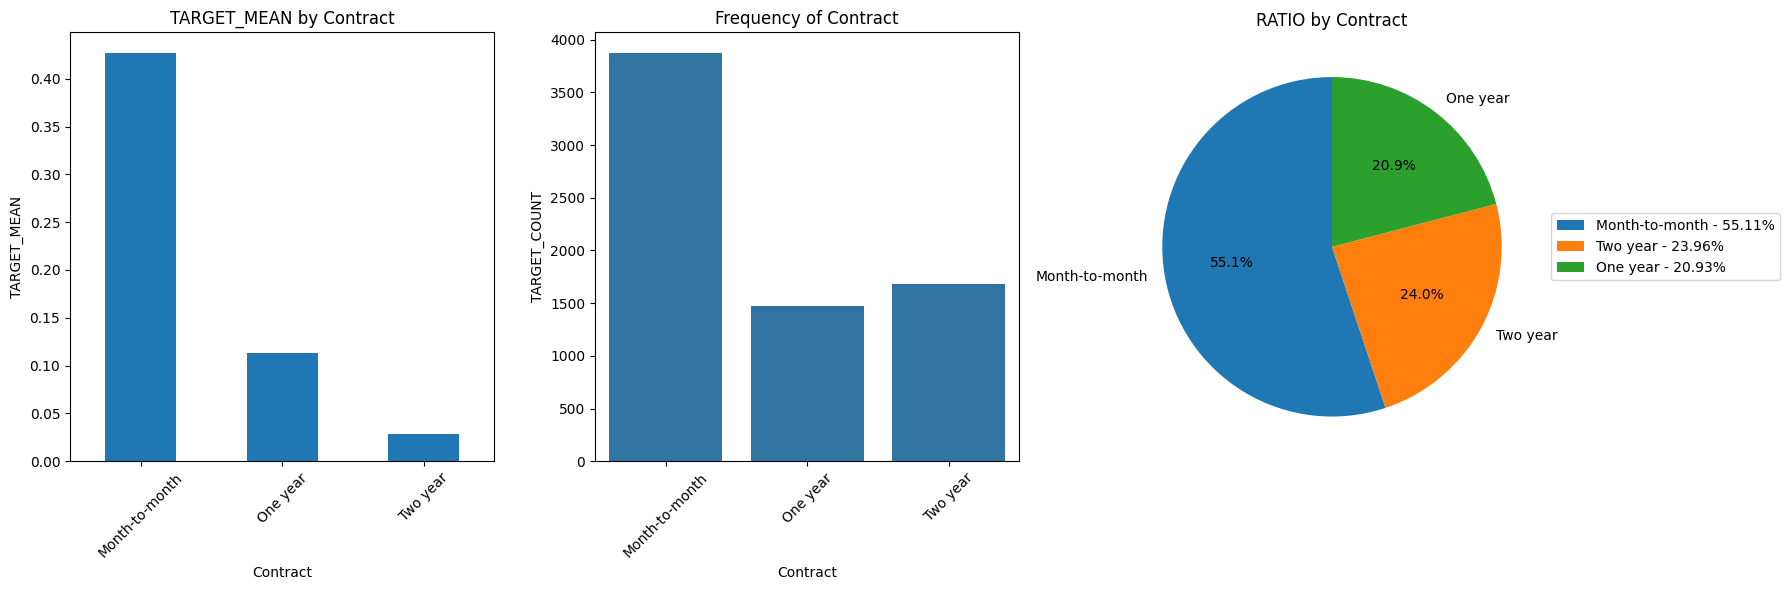

                  TARGET_MEAN  TARGET_COUNT    RATIO
PaperlessBilling                                    
No                   0.163757          2864  40.7281
Yes                  0.335893          4168  59.2719


##########################################


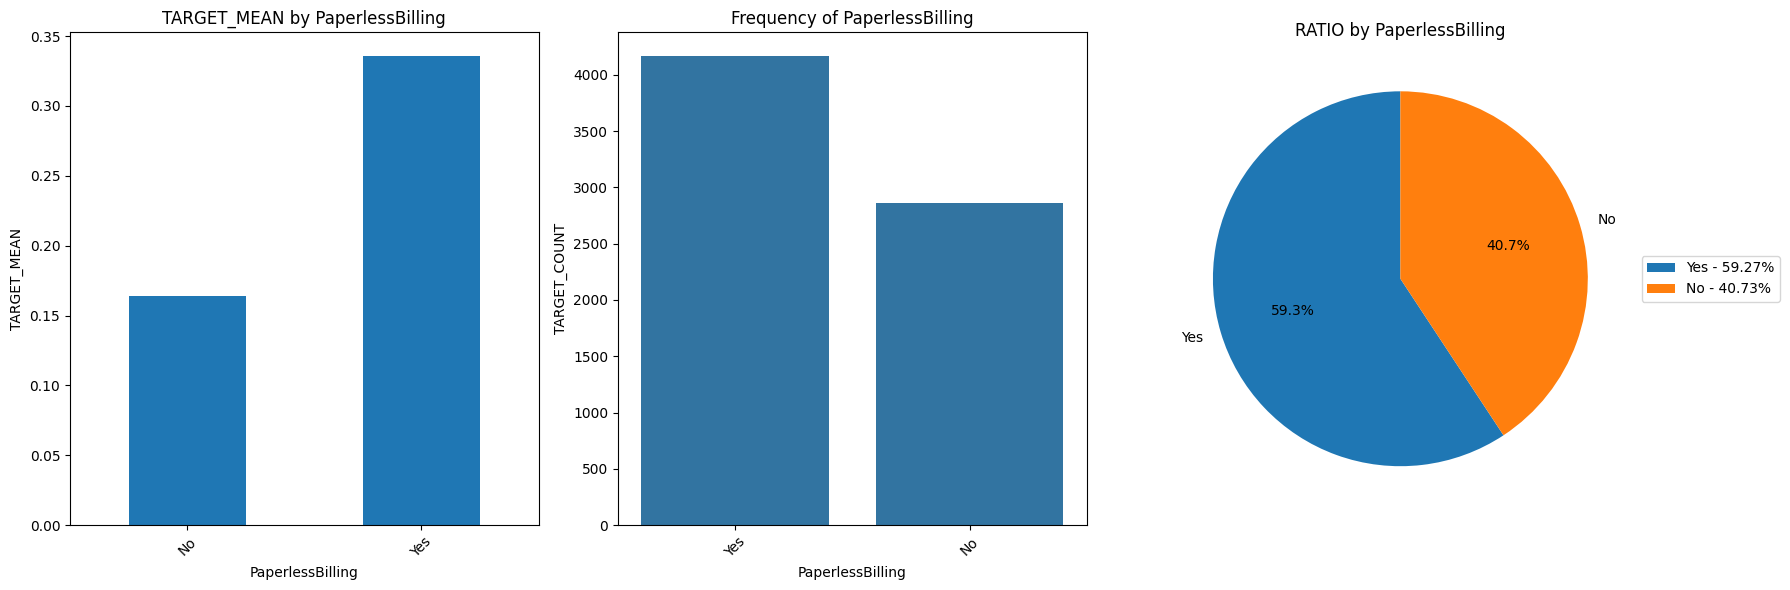

                           TARGET_MEAN  TARGET_COUNT      RATIO
PaymentMethod                                                  
Bank transfer (automatic)     0.167315          1542  21.928328
Credit card (automatic)       0.152531          1521  21.629693
Electronic check              0.452854          2365  33.631968
Mailed check                  0.192020          1604  22.810011


##########################################


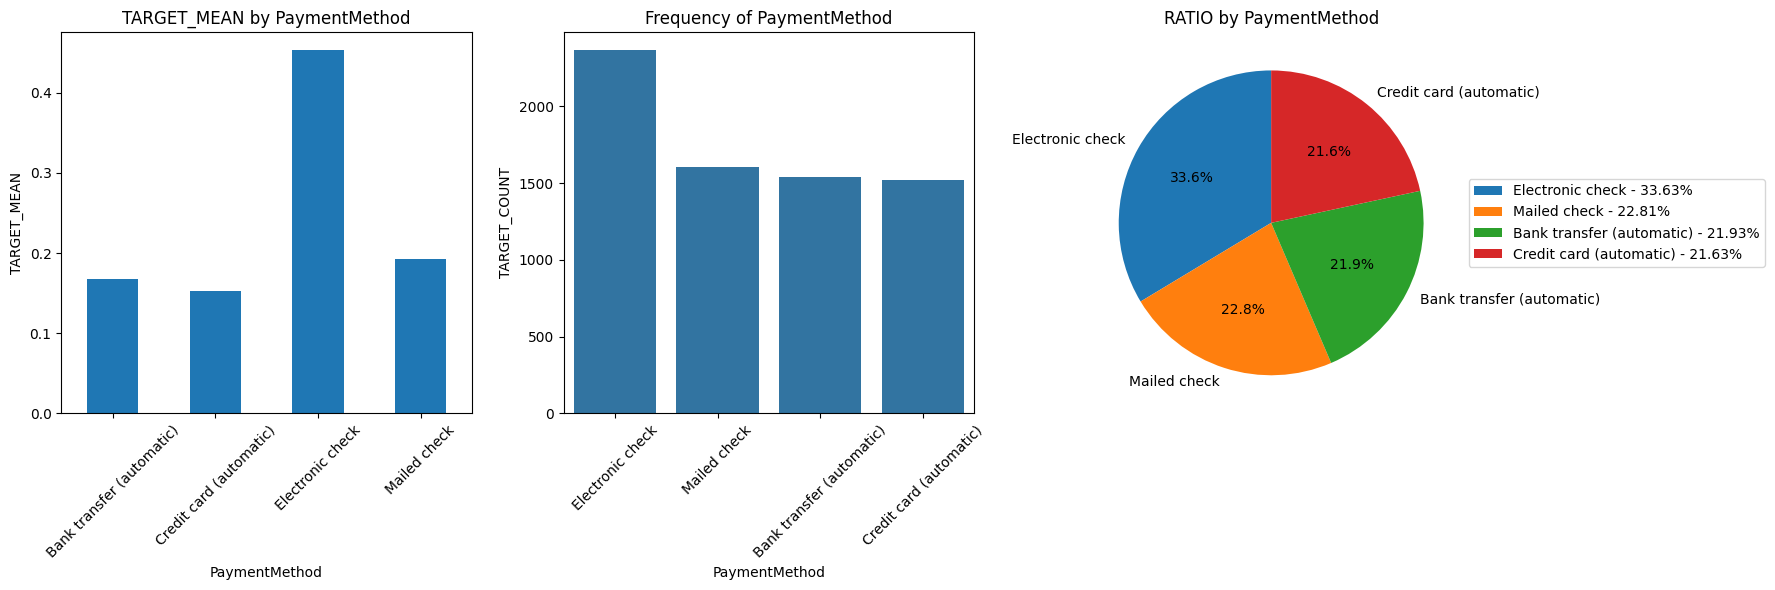

               TARGET_MEAN  TARGET_COUNT      RATIO
SeniorCitizen                                      
0                 0.236503          5890  83.759954
1                 0.416813          1142  16.240046


##########################################


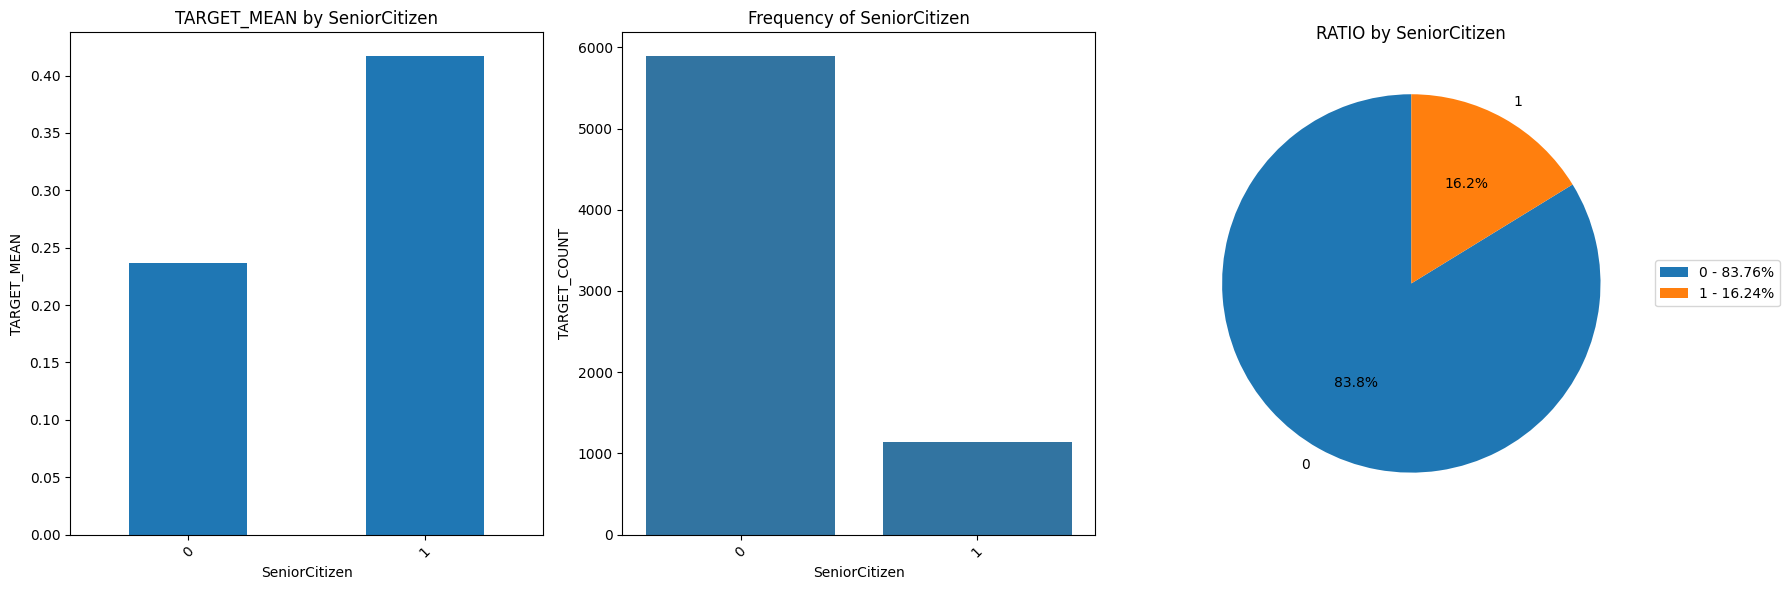

In [27]:
cat_cols = [col for col in cat_cols if "Churn" not in col]

for col in cat_cols:
    target_summary_with_cat(df, "Churn", col, plot=True)

In [28]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    # Group by target and calculate mean
    summary_df = dataframe.groupby(target).agg({numerical_col: "mean"})
    print(summary_df)
    print("##########################################")

    if plot:

        # Bar plot
        summary_df.plot(kind="bar", legend=False)
        plt.title(f"Mean of {numerical_col} by {target}")
        plt.xlabel(target)
        plt.ylabel(f"Mean of {numerical_col}")
        plt.show(block=True)

          tenure
Churn           
0      37.650010
1      17.979133
##########################################


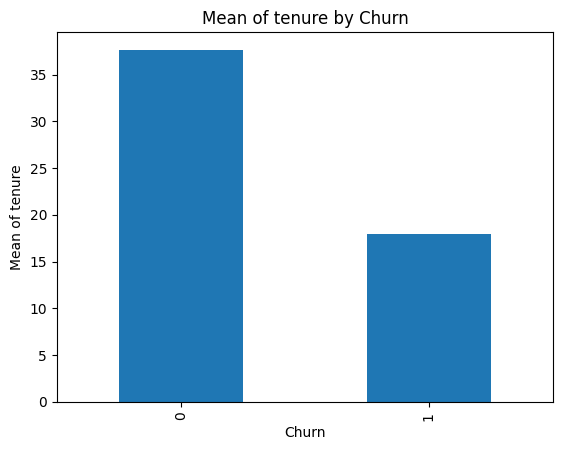

       MonthlyCharges
Churn                
0           61.307408
1           74.441332
##########################################


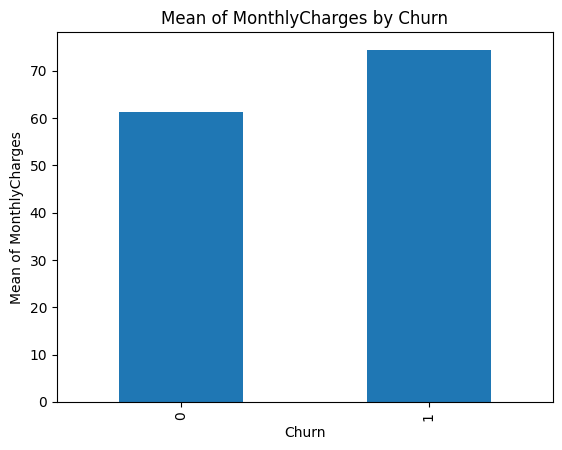

       TotalCharges
Churn              
0       2555.344141
1       1531.796094
##########################################


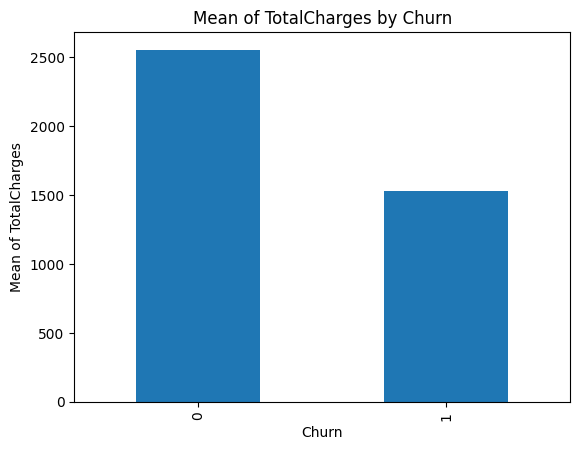

In [29]:


for col in num_cols:
    target_summary_with_num(df, "Churn", col, plot=True)



In [30]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [31]:
for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


In [32]:


def missing_values_table(dataframe, na_name=False, plot=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
    print(missing_df, end="\n")
    print("##########################################")
    
    if plot:
        plt.figure(figsize=(10, 8))
        plt.bar(missing_df.index, missing_df["ratio"]) 
        plt.xlabel("Features")
        plt.ylabel("Percentage of Missing Values")
        plt.title("Missing Values by Feature")

    if na_name:
        return na_columns



Empty DataFrame
Columns: [n_miss, ratio]
Index: []
##########################################


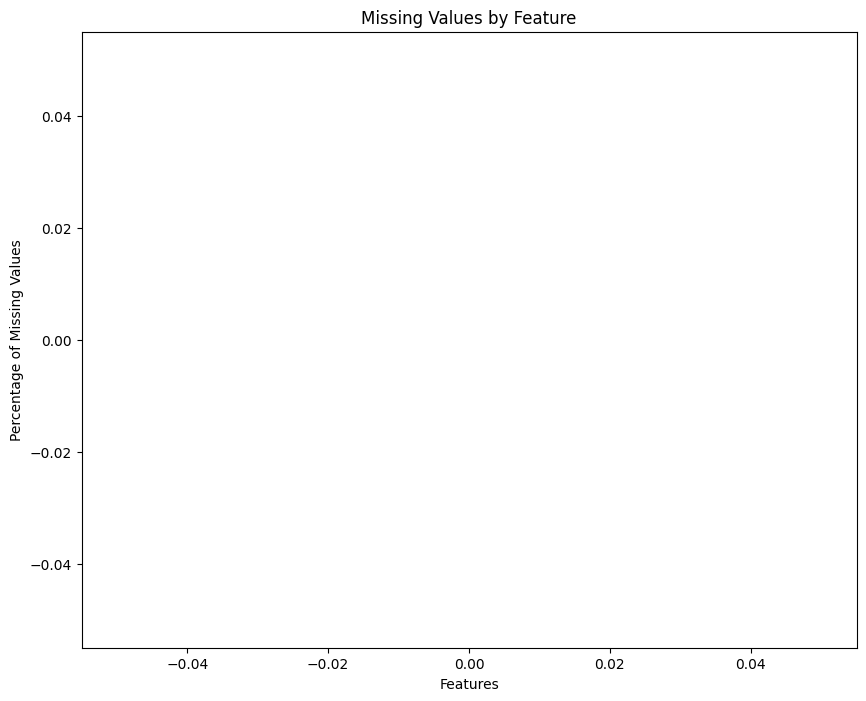

In [33]:
missing_col = missing_values_table(df, na_name=True, plot=True)

In [34]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr(numeric_only=True)
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        sns.set_theme(rc={"figure.figsize": (15, 15)})
        sns.heatmap(corr, annot=True, cmap="RdBu")
        plt.show()
    return drop_list

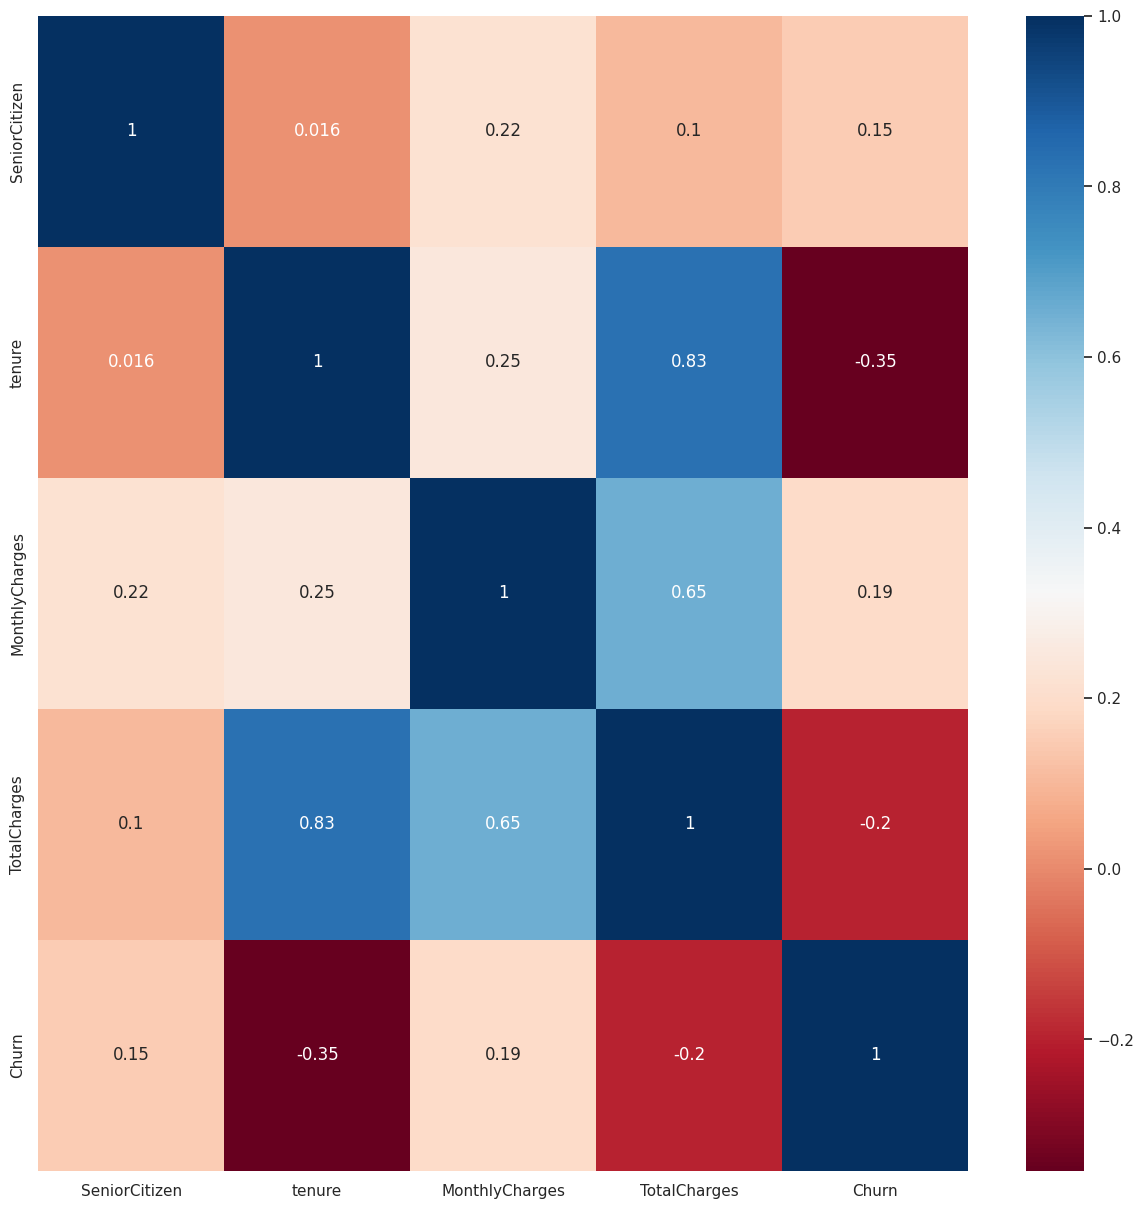

[]

In [35]:
high_correlated_cols(df, plot=True)

In [36]:
dff = df.copy()

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, dtype=int, drop_first=drop_first)
    return dataframe

dff = one_hot_encoder(dff, cat_cols, drop_first=True)
dff.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,45,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [37]:
y = dff["Churn"]
X = dff.drop(["Churn"], axis=1)

models = [("LR", LogisticRegression(random_state=42)),
          ("KNN", KNeighborsClassifier()),
          ("CART", DecisionTreeClassifier(random_state=42)),
          ("RF", RandomForestClassifier(random_state=42)),
          ("SVM", SVC(gamma="auto", random_state=42)),
          ("XGB", XGBClassifier(random_state=42)),
          ("LightGBM", LGBMClassifier(random_state=42, force_row_wise=True)),]

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

NameError: name 'CatBoostClassifier' is not defined